## Importing Libraries/ functions

In [1]:
import sys
sys.path.append("/Users/praveenallam/Desktop/neural-network-regression")

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from datetime import datetime

from sklearn.model_selection import train_test_split
from functions import basic_info, shapiro_test, delivery_partners, order_protocol_value, store_category, market_map
from category_encoders import TargetEncoder

import warnings 
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize'] = (9, 5)
color = ["#8ecae6", "#023047", "#219ebc", "#ffb703", "#fb8500", "#bc6c25"]

## Problem Statement

Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

The company works with a wide range of restaurants for delivering their items directly to the people.

The company has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features

This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features

> Data Dictionary

Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below.

1. *market_id* : integer id for the market where the restaurant lies <br>
2. *created_at* : the timestamp at which the order was placed <br>
3. *actual_delivery_time* : the timestamp when the order was delivered <br>
4. *store_primary_category* : category for the restaurant <br>
5. *order_protocol* : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc) <br>
6. *total_items subtotal* : final price of the order <br>
7. *num_distinct_items* : the number of distinct items in the order <br>
8. *min_item_price* : price of the cheapest item in the order <br>
9. *max_item_price* : price of the costliest item in order <br>
10. *total_onshift_partners* : number of delivery partners on duty at the time order was placed <br>
11. *total_busy_partners* : number of delivery partners attending to other tasks <br>
12. *total_outstanding_orders* : total number of orders to be fulfilled at the moment <br>

## Reading data and basic info, preprocessing

In [3]:
df = pd.read_csv("../datasets/dataset.csv")
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [4]:
basic_info(df)

shape of the date : 
	rows = 197428, columns = 14

missing values: 
	count = 55535


,feature,missing_val_count,missing_val_percentage
11,total_onshift_partners,16262,8.24
12,total_busy_partners,16262,8.24
13,total_outstanding_orders,16262,8.24
4,store_primary_category,4760,2.41
5,order_protocol,995,0.50
0,market_id,987,0.50
2,actual_delivery_time,7,0.00
1,created_at,0,0.00
3,store_id,0,0.00
6,total_items,0,0.00


duplicated records: 
	count = 0

Unique Values : 


,feature,nunique_vals
0,market_id,6
1,created_at,180985
2,actual_delivery_time,178110
3,store_id,6743
4,store_primary_category,74
5,order_protocol,7
6,total_items,57
7,subtotal,8368
8,num_distinct_items,20
9,min_item_price,2312


,fetaure,data type
0,market_id,float64
1,created_at,object
2,actual_delivery_time,object
3,store_id,object
4,store_primary_category,object
5,order_protocol,float64
6,total_items,int64
7,subtotal,int64
8,num_distinct_items,int64
9,min_item_price,int64


In [5]:
df["created_at"] = pd.to_datetime(df.created_at)
df["actual_delivery_time"] = pd.to_datetime(df.actual_delivery_time)

df["created_at_month"] = df.created_at.dt.month_name()
df["created_at_weekday"] = df.created_at.dt.day_name()
df["created_at_hour"] = df.created_at.dt.hour

## these are not required for modelling but can be used for some analysis
df["actual_delivery_month"] = df.actual_delivery_time.dt.month_name()
df["actual_deliveryt_weekday"] = df.actual_delivery_time.dt.day_name()
df["actual_delivery_hour"] = df.actual_delivery_time.dt.hour

## delivery time 
df["delivery_time"] = (df["actual_delivery_time"] - df["created_at"]).dt.total_seconds()/60

In [6]:
weekend = {'Friday' : 0, 'Tuesday' : 0, 'Monday' : 0, 'Thursday' : 0, 'Sunday' : 1, 'Saturday' : 1,
       'Wednesday' : 1}

df["is_weekend"] = df.created_at_weekday.map(weekend)
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,total_busy_partners,total_outstanding_orders,created_at_month,created_at_weekday,created_at_hour,actual_delivery_month,actual_deliveryt_weekday,actual_delivery_hour,delivery_time,is_weekend
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,...,14.0,21.0,February,Friday,22,February,Friday,23.0,62.983333,0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,...,2.0,2.0,February,Tuesday,21,February,Tuesday,22.0,67.066667,0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,...,0.0,0.0,January,Thursday,20,January,Thursday,21.0,29.683333,0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,...,1.0,2.0,February,Tuesday,21,February,Tuesday,22.0,51.250000,0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,...,6.0,9.0,February,Sunday,2,February,Sunday,3.0,39.833333,1


In [7]:
df.market_id = df.market_id.astype("object")
df.order_protocol = df.order_protocol.astype("object")
df.store_primary_category = df.store_primary_category.astype("object")
df.is_weekend = df.is_weekend.astype("object")

In [8]:
numerical_cols = [col for col in df.columns if df[col].dtype != "O" and df[col].dtype != "category" and df[col].dtype != "<M8[ns]"]
numerical_cols

['total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_partners',
 'total_busy_partners',
 'total_outstanding_orders',
 'created_at_hour',
 'actual_delivery_hour',
 'delivery_time']

In [9]:
df.created_at.min(), df.iloc[df.created_at.argmin()].actual_delivery_time, df.iloc[df.created_at.argmin()].delivery_time

(Timestamp('2014-10-19 05:24:15'), Timestamp('2015-01-25 19:11:54'), 141947.65)

In [10]:
df.created_at.max(), df.iloc[df.created_at.argmax()].actual_delivery_time, df.iloc[df.created_at.argmax()].delivery_time

(Timestamp('2015-02-18 06:00:44'),
 Timestamp('2015-02-18 06:49:30'),
 48.766666666666666)

In [11]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
created_at,197428,2015-02-04 22:00:09.537962752,2014-10-19 05:24:15,2015-01-29 02:32:42,2015-02-05 03:29:09.500000,2015-02-12 01:39:18.500000,2015-02-18 06:00:44,NaN
actual_delivery_time,197421,2015-02-04 22:48:23.348914432,2015-01-21 15:58:11,2015-01-29 03:22:29,2015-02-05 04:40:41,2015-02-12 02:25:26,2015-02-19 22:45:31,NaN
total_items,197428.0,3.196391,1.0,2.0,3.0,4.0,411.0,2.666546
subtotal,197428.0,2682.331402,0.0,1400.0,2200.0,3395.0,27100.0,1823.093688
num_distinct_items,197428.0,2.670791,1.0,1.0,2.0,3.0,20.0,1.630255
min_item_price,197428.0,686.21847,-86.0,299.0,595.0,949.0,14700.0,522.038648
max_item_price,197428.0,1159.58863,0.0,800.0,1095.0,1395.0,14700.0,558.411377
total_onshift_partners,181166.0,44.808093,-4.0,17.0,37.0,65.0,171.0,34.526783
total_busy_partners,181166.0,41.739747,-5.0,15.0,34.0,62.0,154.0,32.145733
total_outstanding_orders,181166.0,58.050065,-6.0,17.0,41.0,85.0,285.0,52.66183


- there are no duplicated records
- there are some missing values, which we will impute later
- for ***num_distinct_items***, ***subtotal***, ***total_items***, ***max_item_price***, there is a huge gap between 75% and max value 
- there are some negative values and right skew in ***min_item_price*** 
- ***total_onshift_partners***, ***total_busy_partners***, ***total_outstanding_orders*** they might have some little skew but they got negative values (which is unexpected)
- ***delivery_time***, there is one item which took months to deliver (we can drop it)

## EDA

In [12]:
skew_info = df[numerical_cols].skew().round(2)
skew_info

total_items                  21.41
subtotal                      1.96
num_distinct_items            1.59
min_item_price                2.33
max_item_price                2.20
total_onshift_partners        0.86
total_busy_partners           0.78
total_outstanding_orders      1.20
created_at_hour               0.63
actual_delivery_hour          0.75
delivery_time               439.70
dtype: float64

#### Univariate Analysis

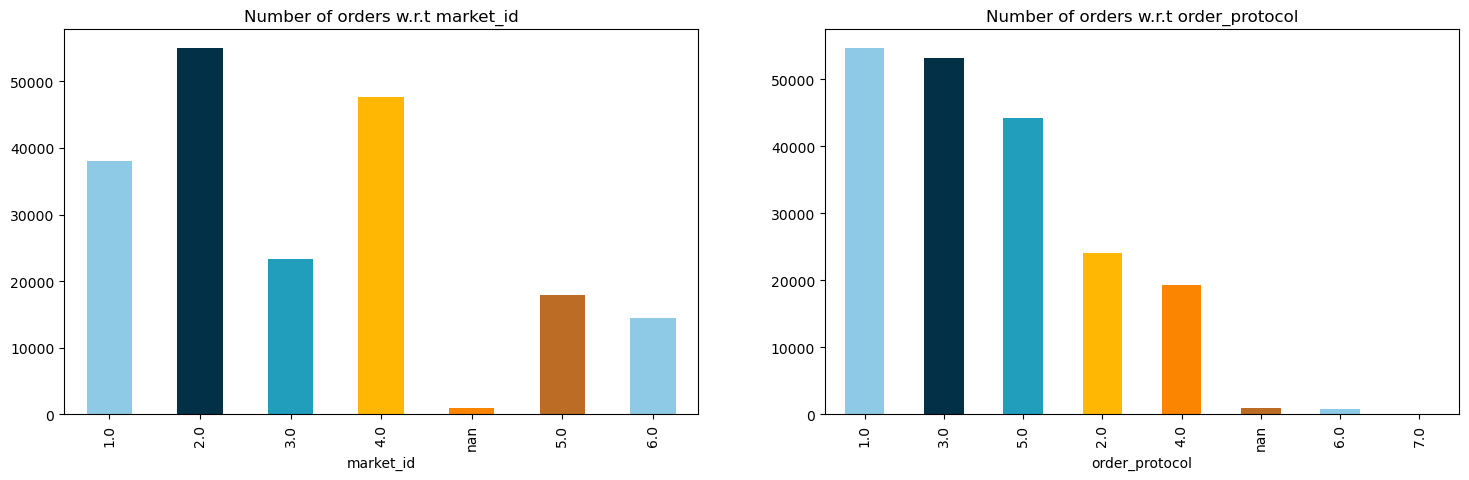

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))
df.market_id.value_counts(sort = False, dropna = False).plot(kind = "bar", color = color, ax = ax[0])
ax[0].set_title("Number of orders w.r.t market_id")
df["order_protocol"].value_counts(dropna = False).plot(kind = "bar", color = color, ax = ax[1])
ax[1].set_title("Number of orders w.r.t order_protocol")
plt.show()

feature num_distinct_items - 
Sample does not look Gaussian (reject H0)
skew = 1.59 

feature total_items - 
Sample does not look Gaussian (reject H0)
skew = 21.41


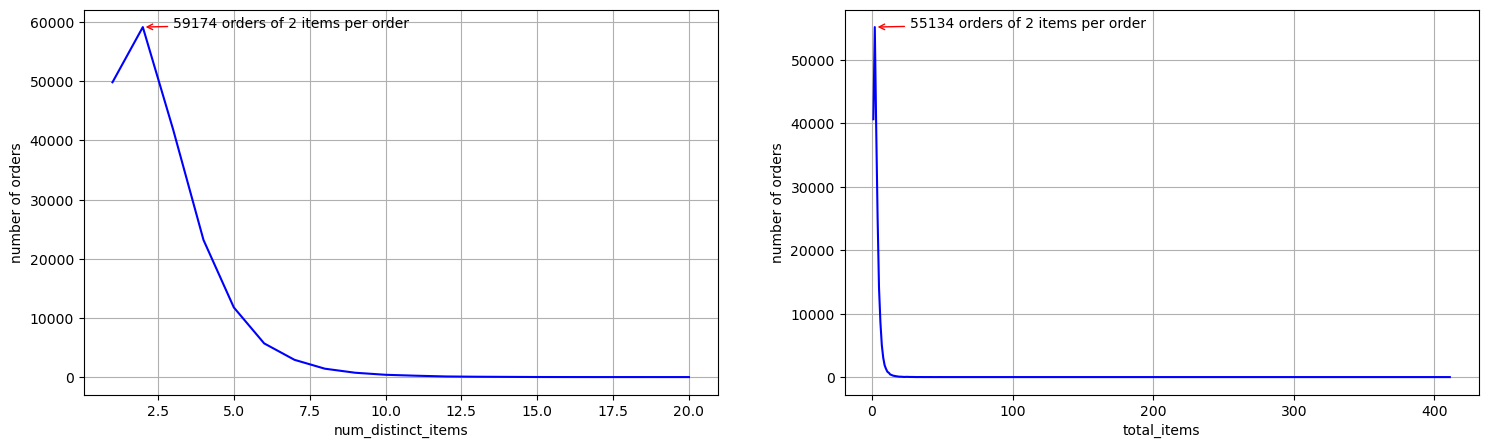

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

print(f"feature num_distinct_items - ")
shapiro_test(df.num_distinct_items)
print(f"skew = {skew_info.loc['num_distinct_items']} \n")

print(f"feature total_items - ")
shapiro_test(df.total_items)
print(f"skew = {skew_info.loc['total_items']}")


df["num_distinct_items"].value_counts().sort_index().plot(kind = "line", grid = True, ylabel = "number of orders", color = "blue", ax = ax[0])
# Finding the maximum value and its corresponding x-coordinate
max_value = df["num_distinct_items"].value_counts().max()
max_index = df["num_distinct_items"].value_counts().idxmax()

# Annotating the maximum point
ax[0].annotate(f'{max_value} orders of {max_index} items per order', xy=(max_index, max_value), xytext=(max_index+1, max_value - 100), arrowprops=dict(arrowstyle='->', color = "red"))

df["total_items"].value_counts().sort_index().plot(kind = "line", grid = True, ylabel = "number of orders", color = "blue", ax = ax[1])
# Finding the maximum value and its corresponding x-coordinate
max_value = df["total_items"].value_counts().max()
max_index = df["total_items"].value_counts().idxmax()

# Annotating the maximum point
ax[1].annotate(f'{max_value} orders of {max_index} items per order', xy=(max_index, max_value), xytext=(max_index+25, max_value - 100), arrowprops=dict(arrowstyle='->', color = "red"))

plt.show()

> we can see that there is a right skew in the above features, but total_items got more skew 

feature created_at_hour - 
Sample does not look Gaussian (reject H0)
skew = 0.63 



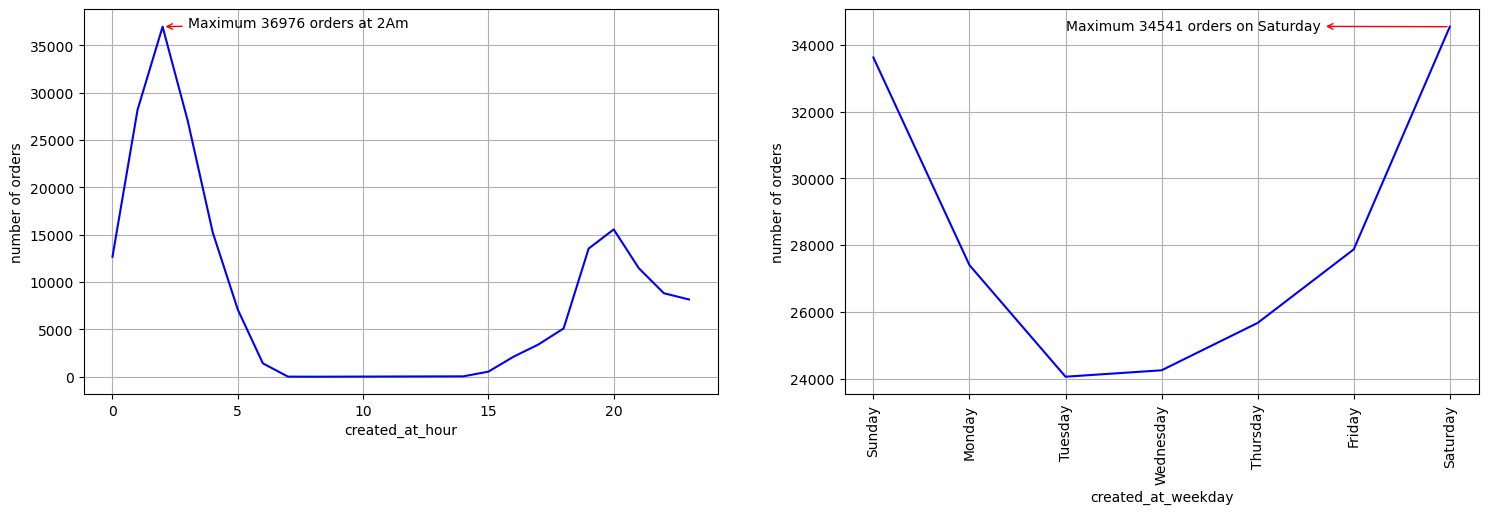

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

print(f"feature created_at_hour - ")
shapiro_test(df.created_at_hour)
print(f"skew = {skew_info.loc['created_at_hour']} \n")

df["created_at_hour"].value_counts().sort_index().plot(kind = "line", grid = True, ylabel = "number of orders", color = "blue", ax = ax[0])
max_value = df["created_at_hour"].value_counts().max()
max_index = df["created_at_hour"].value_counts().idxmax()

ax[0].annotate(f'Maximum {max_value} orders at {max_index}Am', xy=(max_index, max_value), xytext=(max_index+1, max_value - 100), arrowprops=dict(arrowstyle='->', color = "red"))

day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
df["created_at_weekday"].value_counts().reindex(day_order).plot(kind="line", grid=True, ylabel="number of orders", color="blue", ax = ax[1])
plt.xticks(rotation=90)

max_value = df["created_at_weekday"].value_counts().max()
max_index = df["created_at_weekday"].value_counts().idxmax()

ax[1].annotate(f'Maximum {max_value} orders on {max_index}', xy=(day_order.index(max_index), max_value), xytext=(day_order.index(max_index) - 4, max_value - 100), arrowprops=dict(arrowstyle='<-', color="red"))
plt.show()

In [16]:
df["created_at_month"].value_counts().reset_index()

,created_at_month,count
0,February,128945
1,January,68482
2,October,1


> the data contains the the orders that are created in January, February and a single order created in october

- may be the created_at_month be a good feature here, as it does not contain every month
- and order placed in october might be an outler, let's check that later

feature actual_delivery_hour - 
Sample looks Gaussian (fail to reject H0)
skew = 0.75 

average time for delivery = 48.47


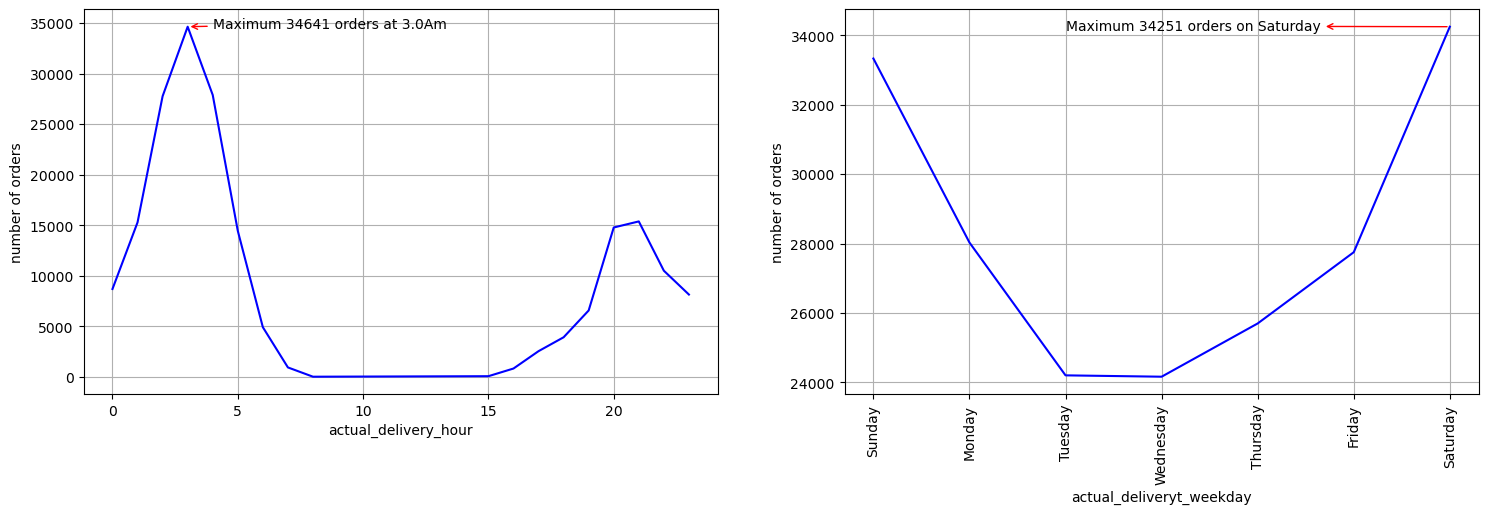

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

print(f"feature actual_delivery_hour - ")
shapiro_test(df.actual_delivery_hour)
print(f"skew = {skew_info.loc['actual_delivery_hour']} \n")
print(f"average time for delivery = {df.delivery_time.mean().round(2)}")

df["actual_delivery_hour"].value_counts().sort_index().plot(kind = "line", grid = True, ylabel = "number of orders", color = "blue", ax = ax[0])
max_value = df["actual_delivery_hour"].value_counts().max()
max_index = df["actual_delivery_hour"].value_counts().idxmax()

ax[0].annotate(f'Maximum {max_value} orders at {max_index}Am', xy=(max_index, max_value), xytext=(max_index+1, max_value - 100), arrowprops=dict(arrowstyle='->', color = "red"))

day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
df["actual_deliveryt_weekday"].value_counts().reindex(day_order).plot(kind="line", grid=True, ylabel="number of orders", color="blue", ax = ax[1])
plt.xticks(rotation=90)

max_value = df["actual_deliveryt_weekday"].value_counts().max()
max_index = df["actual_deliveryt_weekday"].value_counts().idxmax()

ax[1].annotate(f'Maximum {max_value} orders on {max_index}', xy=(day_order.index(max_index), max_value), xytext=(day_order.index(max_index) - 4, max_value - 100), arrowprops=dict(arrowstyle='<-', color="red"))
plt.show()

In [18]:
df.actual_delivery_month.value_counts()

actual_delivery_month
February    129191
January      68230
Name: count, dtype: int64

> the data contains the the orders that are delievred in January, February

- and order placed in october might be an outler, and it is delivered in Jan or Feb

In [19]:
df[df.created_at_month == "October"]
# this seems like an outlier

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,total_busy_partners,total_outstanding_orders,created_at_month,created_at_weekday,created_at_hour,actual_delivery_month,actual_deliveryt_weekday,actual_delivery_hour,delivery_time,is_weekend
2690,1.0,2014-10-19 05:24:15,2015-01-25 19:11:54,675f9820626f5bc0afb47b57890b466e,italian,1.0,1,1695,1,1595,...,NaN,NaN,October,Sunday,5,January,Sunday,19.0,141947.65,1


In [20]:
print(f"the minimum delivery time = {df.delivery_time.min()} minutes")
print(f"the maximum delivery time = {df.delivery_time.max()} minutes -> {df.delivery_time.max()/60} hours -> {df.delivery_time.max()/(24 * 60)} days")

the minimum delivery time = 1.6833333333333333 minutes
the maximum delivery time = 141947.65 minutes -> 2365.7941666666666 hours -> 98.57475694444445 days


feature subtotal - 
Sample does not look Gaussian (reject H0)
skew = 1.96 



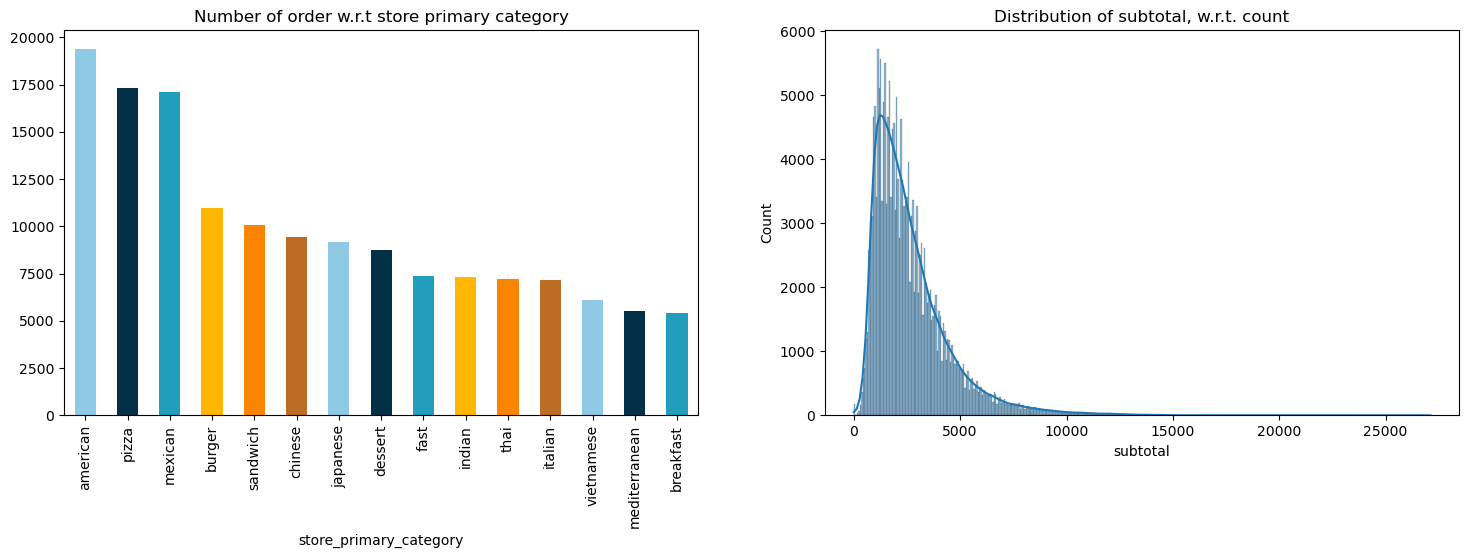

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

print(f"feature subtotal - ")
shapiro_test(df.subtotal)
print(f"skew = {skew_info.loc['subtotal']} \n")

df.store_primary_category.value_counts().head(15).plot(kind = "bar", color = color, ax = ax[0])
ax[0].set_title("Number of order w.r.t store primary category")

sns.histplot(df.subtotal, ax = ax[1], kde = True)
ax[1].set_title("Distribution of subtotal, w.r.t. count")
plt.show()

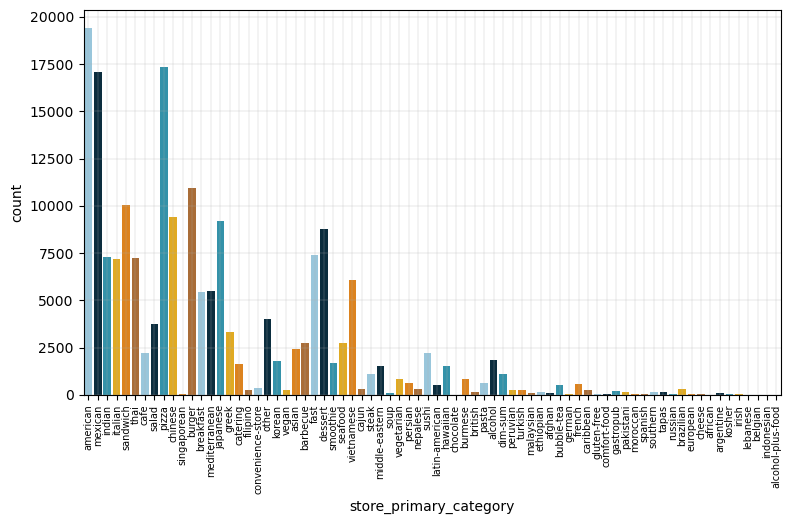

In [22]:
sns.countplot(x = df.store_primary_category, palette = color)
plt.xticks(rotation = 90, fontsize = 7)
plt.grid(True, linewidth = 0.2)
plt.show()

feature total_onshift_partners - 
Sample looks Gaussian (fail to reject H0)
skew = 0.86 

feature total_busy_partners - 
Sample looks Gaussian (fail to reject H0)
skew = 0.78 



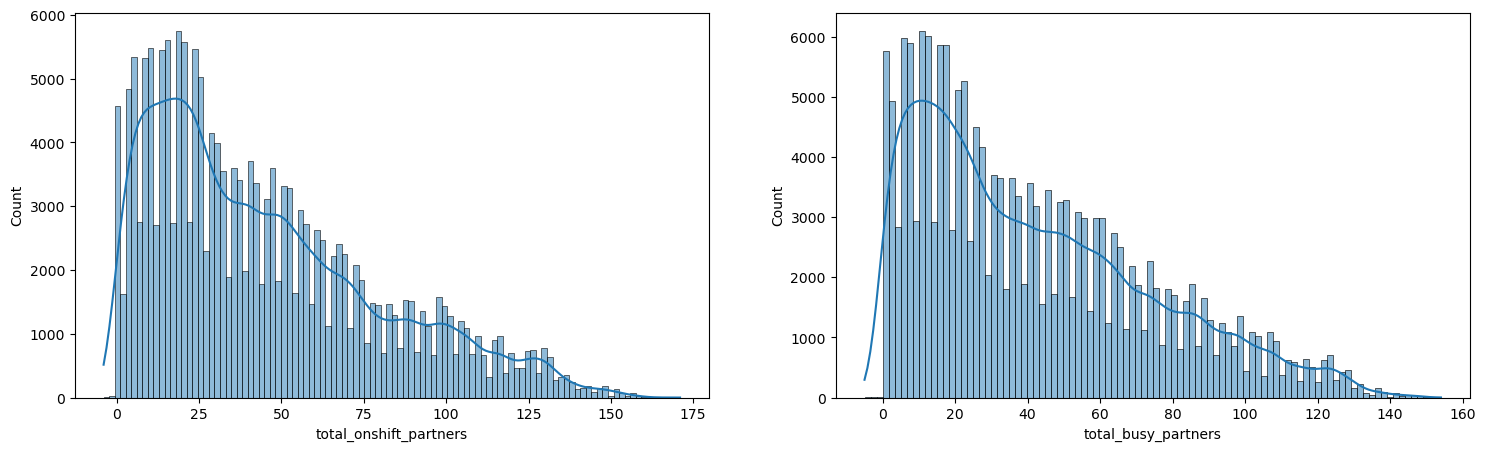

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

print(f"feature total_onshift_partners - ")
shapiro_test(df.total_onshift_partners)
print(f"skew = {skew_info.loc['total_onshift_partners']} \n")

print(f"feature total_busy_partners - ")
shapiro_test(df.total_busy_partners)
print(f"skew = {skew_info.loc['total_busy_partners']} \n")

sns.histplot(df.total_onshift_partners, ax = ax[0], kde = True)
sns.histplot(df.total_busy_partners, ax = ax[1], kde = True)
plt.show()

feature total_outstanding_orders - 
Sample looks Gaussian (fail to reject H0)
skew = 1.2 



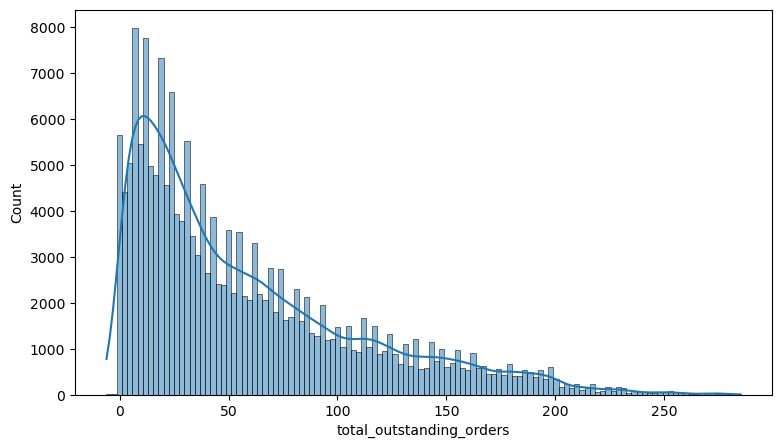

In [24]:
print(f"feature total_outstanding_orders - ")
shapiro_test(df.total_outstanding_orders)
print(f"skew = {skew_info.loc['total_outstanding_orders']} \n")

sns.histplot(df.total_outstanding_orders, kde = True)
plt.show()

feature min_item_price - 
Sample does not look Gaussian (reject H0)
skew = 2.33 

feature max_item_price - 
Sample does not look Gaussian (reject H0)
skew = 2.2 



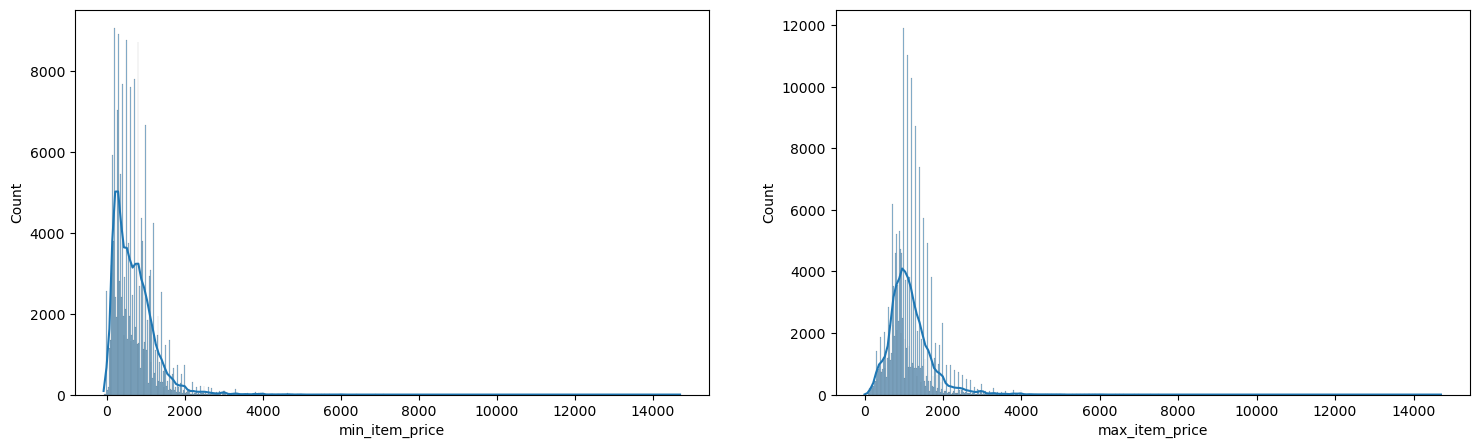

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

print(f"feature min_item_price - ")
shapiro_test(df.min_item_price)
print(f"skew = {skew_info.loc['min_item_price']} \n")

print(f"feature max_item_price - ")
shapiro_test(df.max_item_price)
print(f"skew = {skew_info.loc['max_item_price']} \n")

sns.histplot(df.min_item_price, ax = ax[0], kde = True)
sns.histplot(df.max_item_price, ax = ax[1], kde = True)
plt.show()

feature delivery_time - 
Sample looks Gaussian (fail to reject H0)
skew = 439.7 



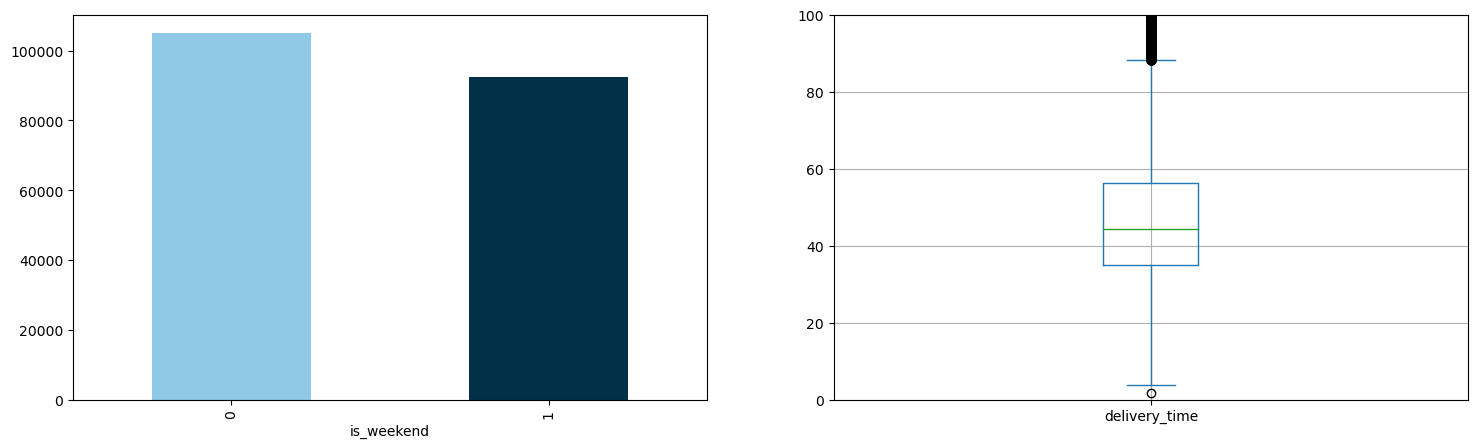

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

print(f"feature delivery_time - ")
shapiro_test(df.delivery_time)
print(f"skew = {skew_info.loc['delivery_time']} \n")

df.is_weekend.value_counts(sort = False, dropna = False).plot(kind = "bar", color = color, ax = ax[0])
df.delivery_time.plot(kind = "box", label = "delivery_time", grid = True, ax = ax[1])
ax[1].set_ylim(0,100)
plt.show()

- Most of the order are from Market 2, 4 (there are some NaN values too, imputing with mode might increase bias and increase the count of Market id 2)
- order protocols 1,3,5 are being used most for ordering
- the number of distinct items, and total items are of 2 items per order (if a person is ordering 1 item, then we can provide some coupon to make him add another item, let's check it later)
- Most of the orders are at early morning 2Am and on weekends
- On an average it is taking 48 mins to deliver the order (there might be some ouliers which is effecting the average delivery time)
- American, pizza, mexican are top ordered categories from stores 
- the negative values in ***min_item_price***, ***total_onshift_partners***, ***total_busy_partners***, ***total_outstanding_orders*** as discussed earlier

#### Bi-variate & Multi-variate Analysis

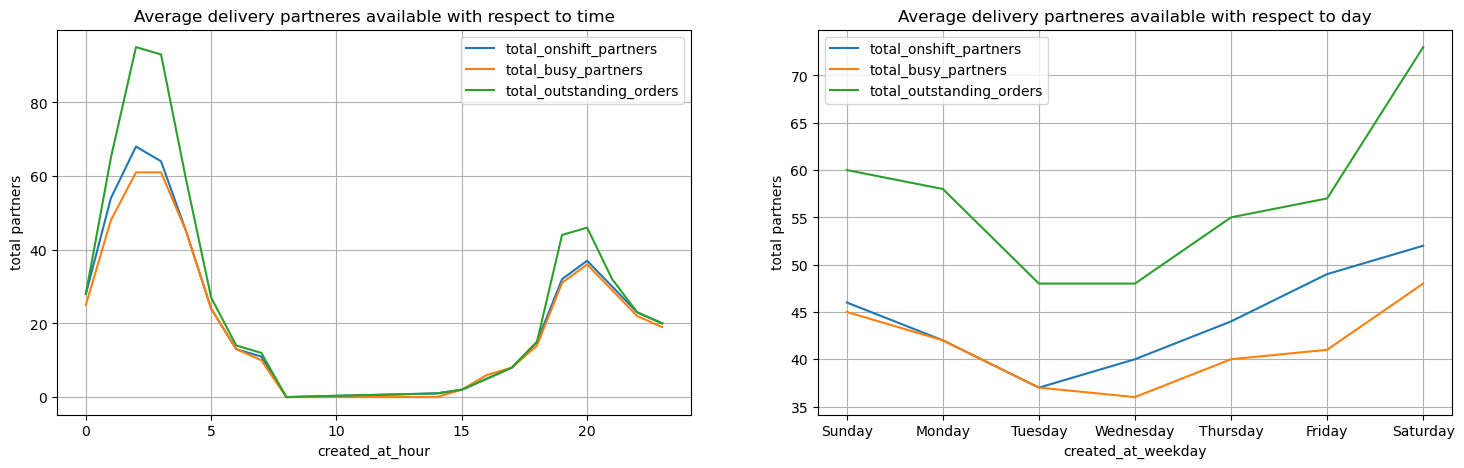

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))
df.groupby(by = ["created_at_hour"])[["total_onshift_partners", "total_busy_partners", "total_outstanding_orders"]].mean().round().plot(kind = "line", grid = True, ax = ax[0])
ax[0].set_title("Average delivery partneres available with respect to time")
ax[0].set_ylabel("total partners")

df.groupby(by = ["created_at_weekday"])[["total_onshift_partners", "total_busy_partners", "total_outstanding_orders"]].mean().round().loc[day_order, :].plot(kind = "line", grid = True, ax = ax[1])
ax[1].set_title("Average delivery partneres available with respect to day")
ax[1].set_ylabel("total partners")
plt.show()

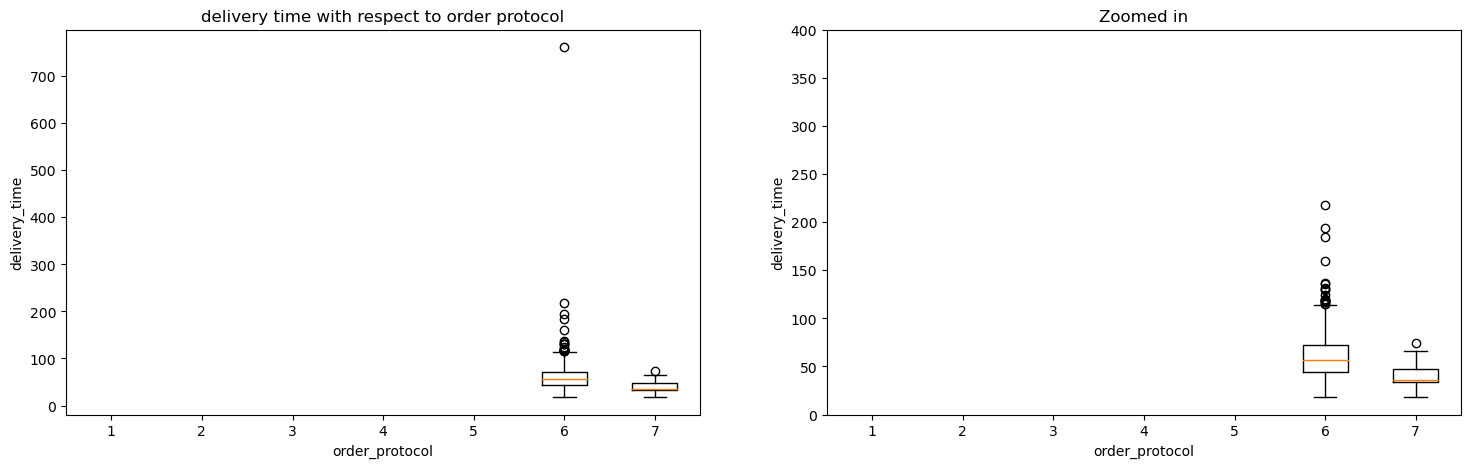

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

boxplot_data = [group[1] for group in df.groupby(by = ["order_protocol"])["delivery_time"]]
ax[0].boxplot(boxplot_data)
ax[0].set_xlabel("order_protocol")
ax[0].set_ylabel("delivery_time")
ax[0].set_title("delivery time with respect to order protocol")

ax[1].boxplot(boxplot_data)
ax[1].set_xlabel("order_protocol")
ax[1].set_ylabel("delivery_time")
ax[1].set_title("Zoomed in")
ax[1].set_ylim(0, 400)  
plt.show()


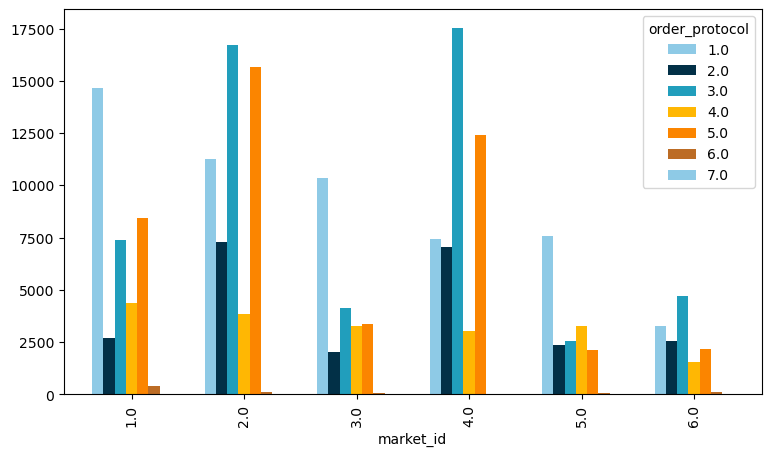

In [29]:
df.groupby(by = ["market_id", "order_protocol"])["order_protocol"].apply("count").unstack().plot(kind='bar', stacked=False, width=0.7, color = color)
plt.show()

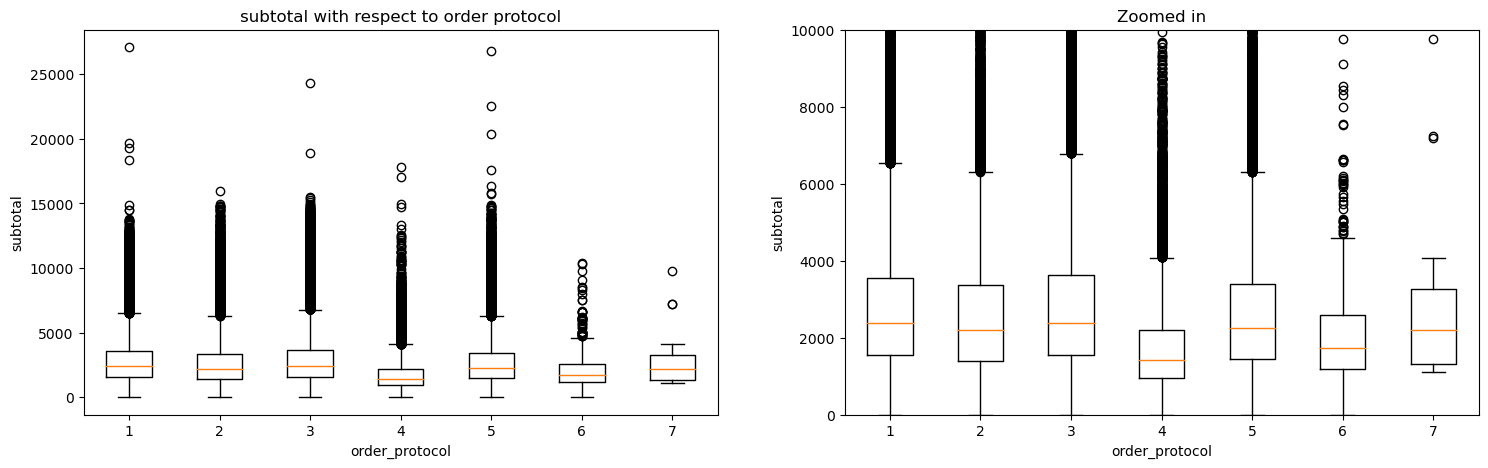

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

boxplot_data = [group[1] for group in df.groupby(by = ["order_protocol"])["subtotal"]]
ax[0].boxplot(boxplot_data)
ax[0].set_xlabel("order_protocol")
ax[0].set_ylabel("subtotal")
ax[0].set_title("subtotal with respect to order protocol")

ax[1].boxplot(boxplot_data)
ax[1].set_xlabel("order_protocol")
ax[1].set_ylabel("subtotal")
ax[1].set_title("Zoomed in")
ax[1].set_ylim(0, 10000)  
plt.show()


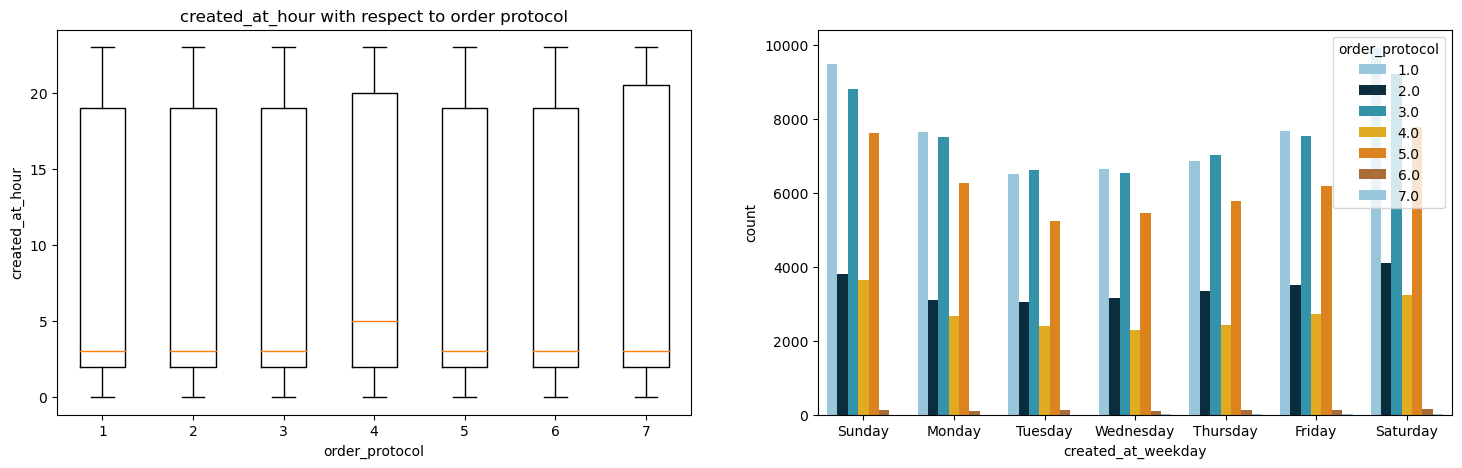

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

boxplot_data = [group[1] for group in df.groupby(by = ["order_protocol"])["created_at_hour"]]
ax[0].boxplot(boxplot_data)
ax[0].set_xlabel("order_protocol")
ax[0].set_ylabel("created_at_hour")
ax[0].set_title("created_at_hour with respect to order protocol")

sns.countplot(hue = df.order_protocol, x = df.created_at_weekday, order = day_order, palette = color, ax = ax[1])
plt.show()


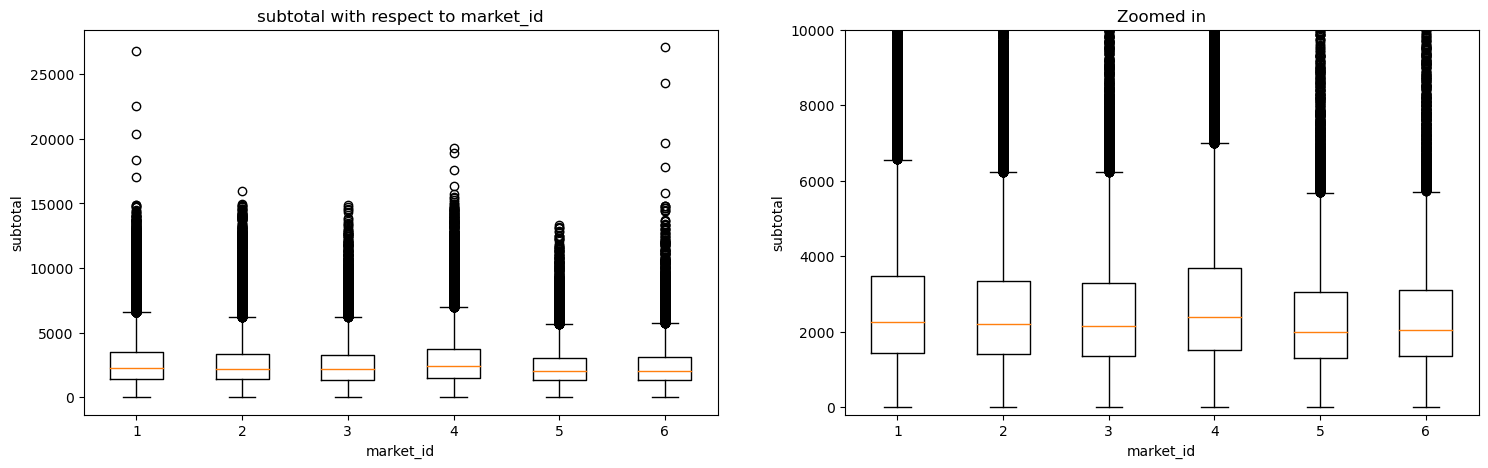

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

boxplot_data = [group[1] for group in df.groupby(by = ["market_id"])["subtotal"]]
ax[0].boxplot(boxplot_data)
ax[0].set_xlabel("market_id")
ax[0].set_ylabel("subtotal")
ax[0].set_title("subtotal with respect to market_id")

ax[1].boxplot(boxplot_data)
ax[1].set_xlabel("market_id")
ax[1].set_ylabel("subtotal")
ax[1].set_title("Zoomed in")
ax[1].set_ylim(-200, 10000)  
plt.show()


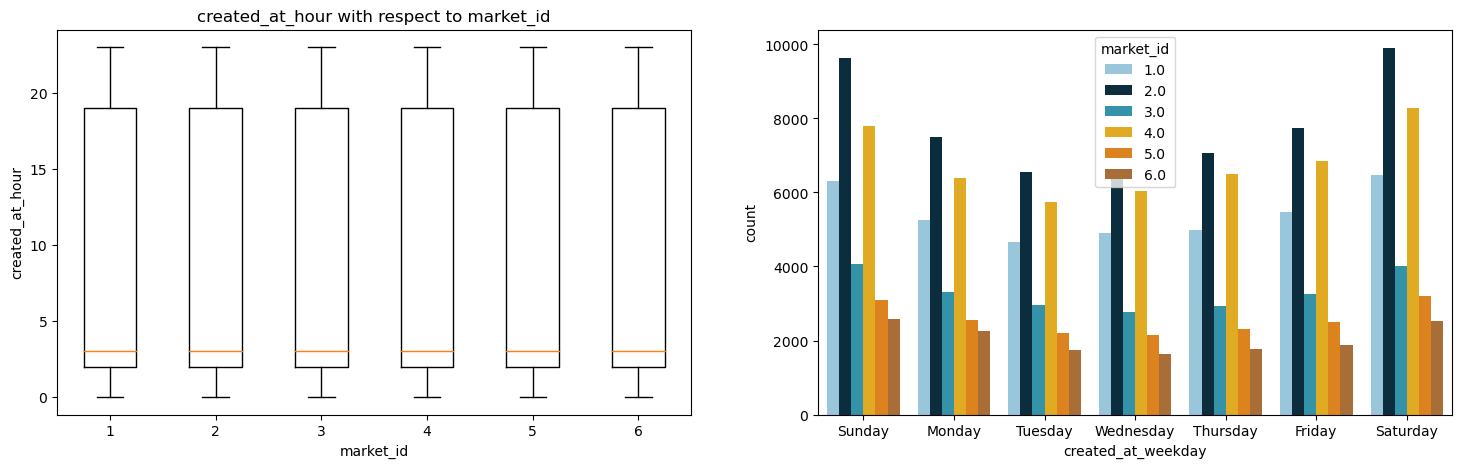

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

boxplot_data = [group[1] for group in df.groupby(by = ["market_id"])["created_at_hour"]]
ax[0].boxplot(boxplot_data)
ax[0].set_xlabel("market_id")
ax[0].set_ylabel("created_at_hour")
ax[0].set_title("created_at_hour with respect to market_id")

sns.countplot(hue = df.market_id, x = df.created_at_weekday, order = day_order, palette = color, ax = ax[1])
plt.show()


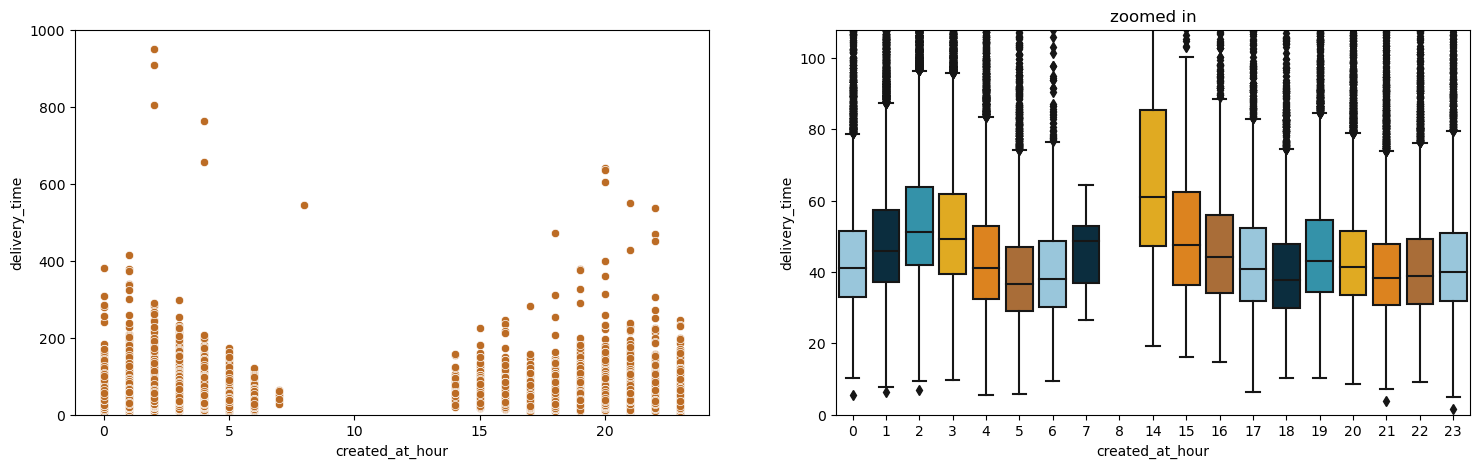

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))
sns.scatterplot(x = df.created_at_hour, y = df.delivery_time, ax = ax[0], color = color[5])
ax[0].set_ylim(0,1000)

sns.boxplot(x = df.created_at_hour, y = df.delivery_time, ax = ax[1], palette = color)
ax[1].set_ylim(0,107.91333333333314)
ax[1].set_title("zoomed in")
plt.show()

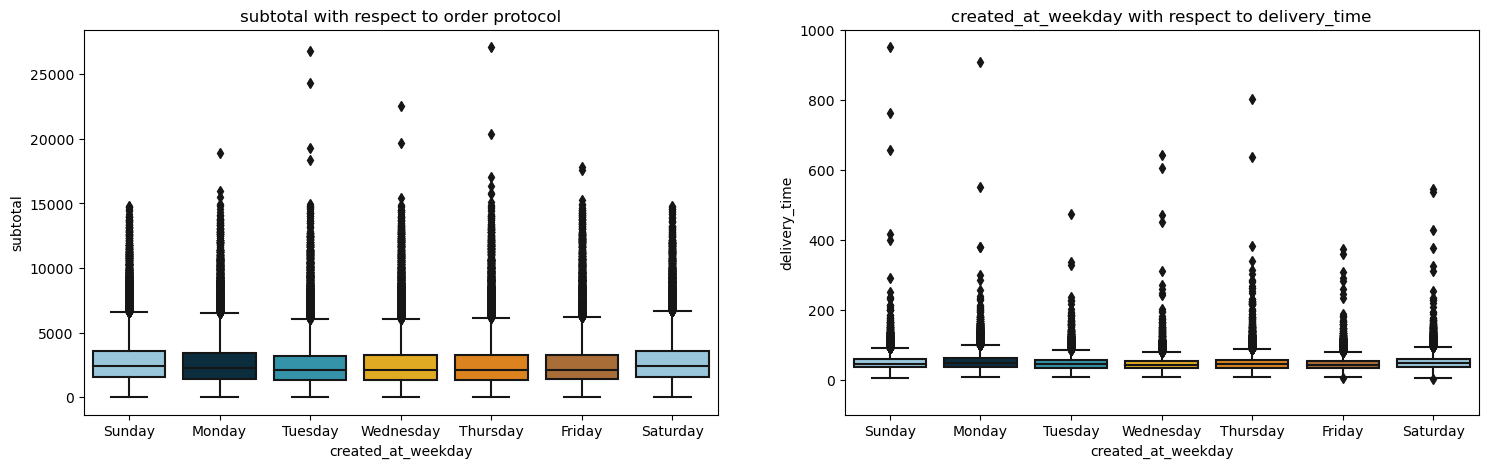

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

sns.boxplot(x = df.created_at_weekday, y = df.subtotal, palette = color, ax = ax[0], order = day_order)
ax[0].set_xlabel("created_at_weekday")
ax[0].set_ylabel("subtotal")
ax[0].set_title("subtotal with respect to order protocol")

sns.boxplot(x = df.created_at_weekday, y = df.delivery_time, palette = color, ax = ax[1],  order = day_order)
ax[1].set_xlabel("created_at_weekday")
ax[1].set_ylabel("delivery_time")
ax[1].set_title("created_at_weekday with respect to delivery_time")
ax[1].set_ylim(-100, 1000)
plt.show()


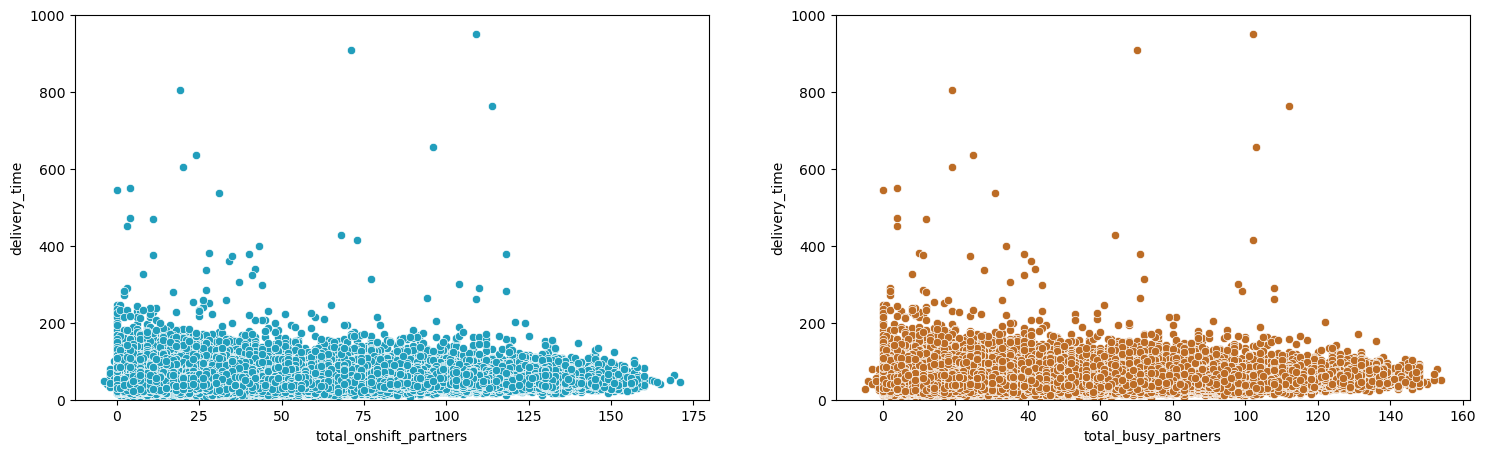

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

sns.scatterplot(x = df.total_onshift_partners, y = df.delivery_time, ax = ax[0], color = color[2])
ax[0].set_ylim(0, 1000)

sns.scatterplot(x = df.total_busy_partners, y = df.delivery_time, ax = ax[1], color = color[5])
ax[1].set_ylim(0, 1000)

plt.show()

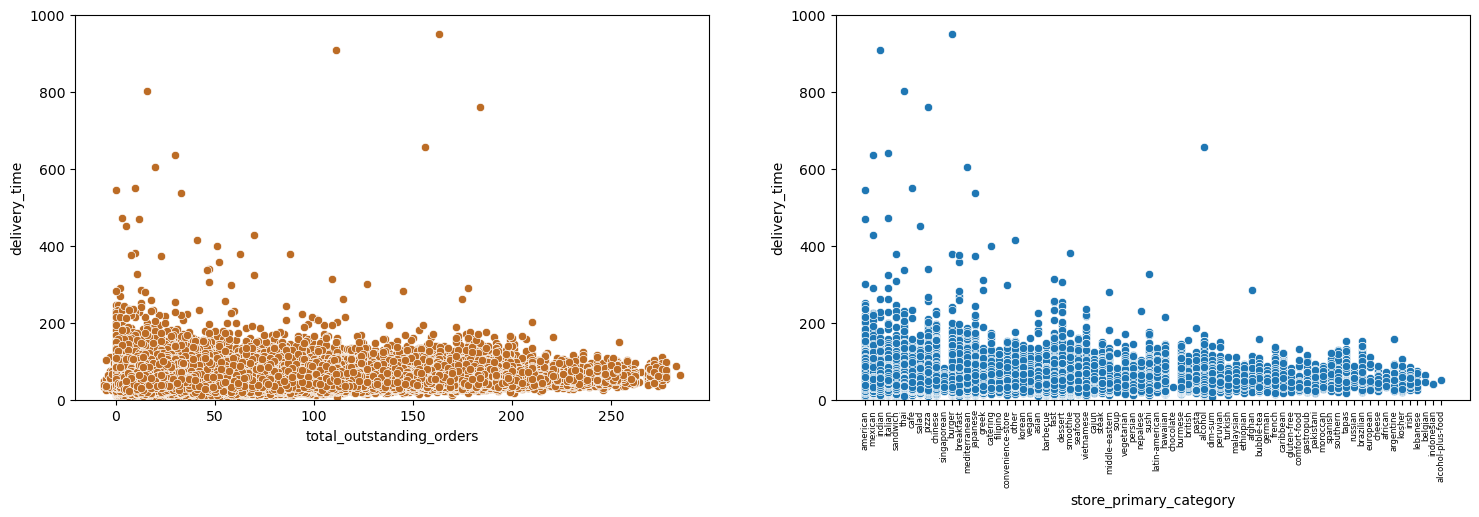

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

sns.scatterplot(x = df.total_outstanding_orders, y = df.delivery_time, color = color[5], ax = ax[0])
ax[0].set_ylim(0, 1000)

sns.scatterplot(x = df.store_primary_category, y = df.delivery_time, ax = ax[1])
ax[1].set_ylim(0, 1000)
ax[1].tick_params(axis='x', rotation=90, labelsize = 6)
plt.show()

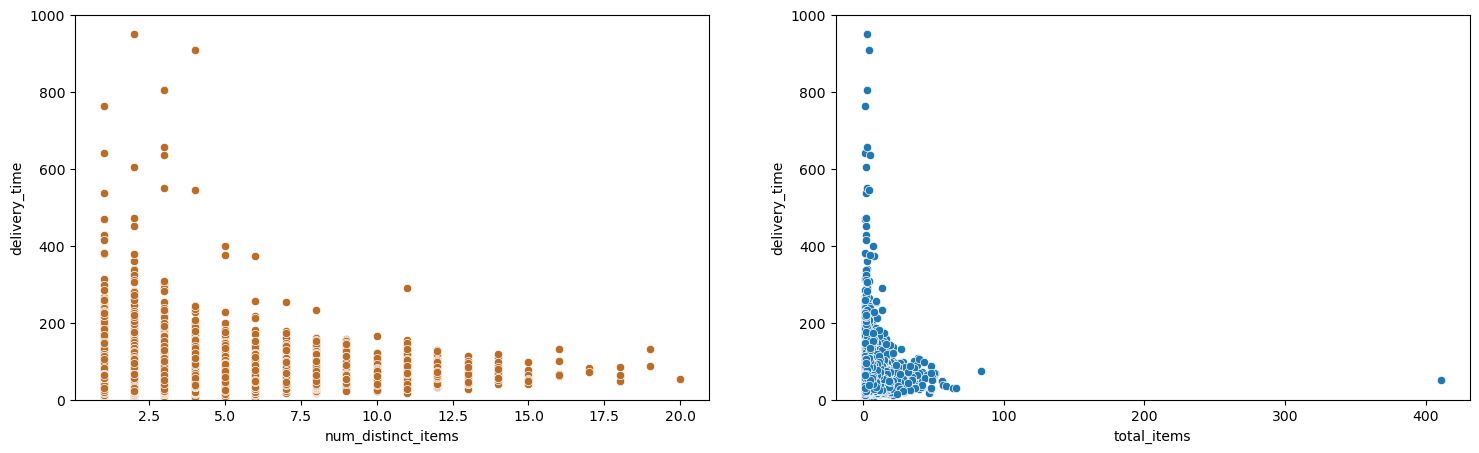

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))
sns.scatterplot(x = df.num_distinct_items, y = df.delivery_time, ax = ax[0], color = color[5])
ax[0].set_ylim(0,1000)

sns.scatterplot(x = df.total_items, y = df.delivery_time, ax = ax[1], palette = color)
ax[1].set_ylim(0,1000)
plt.show()

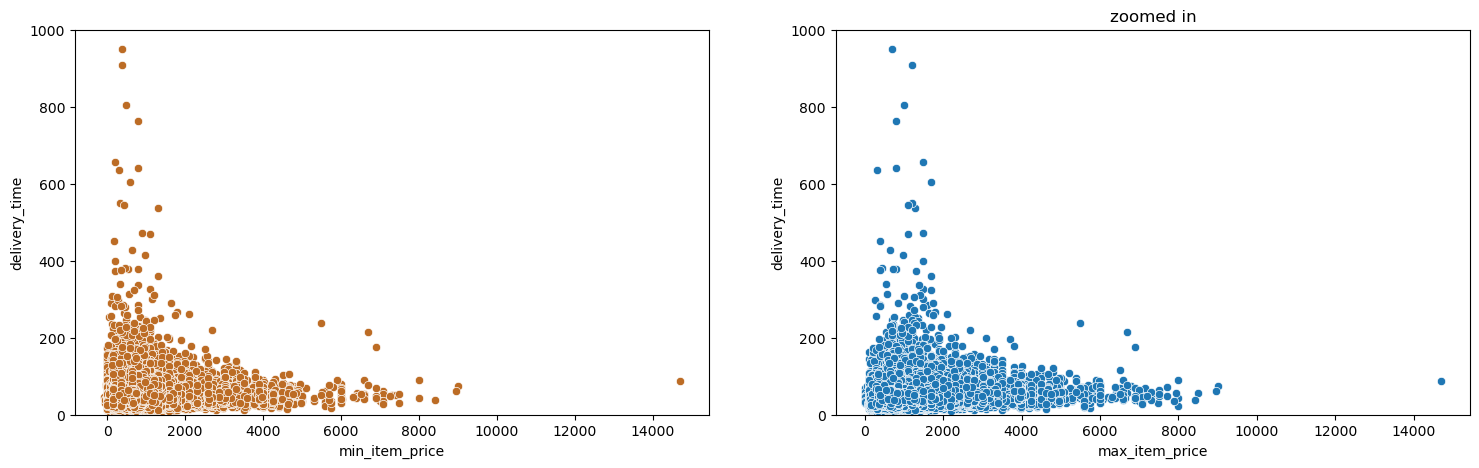

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))
sns.scatterplot(x = df.min_item_price, y = df.delivery_time, ax = ax[0], color = color[5])
ax[0].set_ylim(0,1000)

sns.scatterplot(x = df.max_item_price, y = df.delivery_time, ax = ax[1], palette = color)
ax[1].set_ylim(0,1000)
ax[1].set_title("zoomed in")
plt.show()

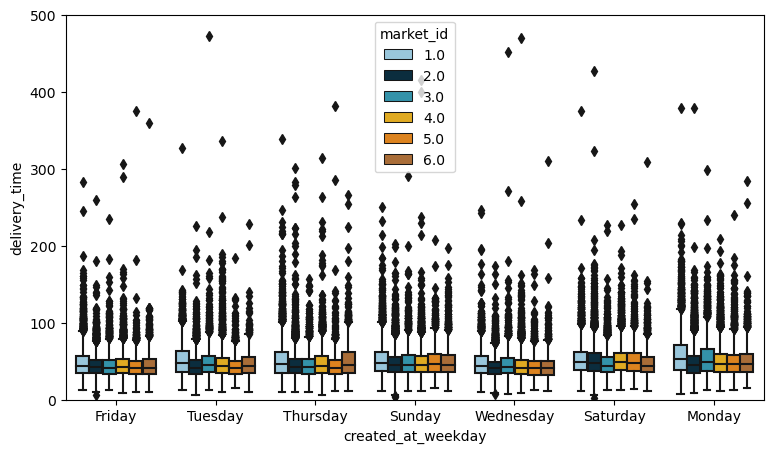

In [40]:
sns.boxplot(x = df.created_at_weekday, y = df.delivery_time, hue = df.market_id, palette = color)
plt.ylim(0,500)
plt.show()

> let's find out what's making the min_item_price and other features < 0

In [41]:
neg_valued_cols = df[numerical_cols].columns[(df[numerical_cols] < 0).any(axis = 0)].tolist()
neg_valued_cols

['min_item_price',
 'total_onshift_partners',
 'total_busy_partners',
 'total_outstanding_orders']

In [42]:
df_neg = df[(df[neg_valued_cols] < 0).any(axis=1)]
print(df_neg.shape)
display(df_neg.head())

(94, 22)


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,total_busy_partners,total_outstanding_orders,created_at_month,created_at_weekday,created_at_hour,actual_delivery_month,actual_deliveryt_weekday,actual_delivery_hour,delivery_time,is_weekend
790,1.0,2015-01-29 02:59:28,2015-01-29 03:44:09,c56a4706337730e0e15da875405fa1c5,fast,4.0,3,1003,3,-86,...,29.0,38.0,January,Thursday,2,January,Thursday,3.0,44.683333,0
1351,2.0,2015-02-06 05:26:55,2015-02-06 06:15:41,f806c5d2707545d718717be03e69a8d4,fast,4.0,35,1786,4,-1,...,36.0,52.0,February,Friday,5,February,Friday,6.0,48.766667,0
4989,1.0,2015-02-18 00:36:21,2015-02-18 01:12:28,f937c8fddbe66ab03c563f16d5cfa50c,smoothie,2.0,2,1940,1,840,...,14.0,-2.0,February,Wednesday,0,February,Wednesday,1.0,36.116667,1
6034,3.0,2015-02-14 01:48:58,2015-02-14 03:00:13,5faa4ad014bbddf9ae4006a0f03085e0,american,1.0,2,3538,2,1238,...,2.0,10.0,February,Saturday,1,February,Saturday,3.0,71.250000,1
7997,1.0,2015-02-08 15:41:45,2015-02-08 16:35:01,226d1f15ecd35f784d2a20c3ecf56d7f,sandwich,3.0,1,1514,1,1116,...,-1.0,3.0,February,Sunday,15,February,Sunday,16.0,53.266667,1


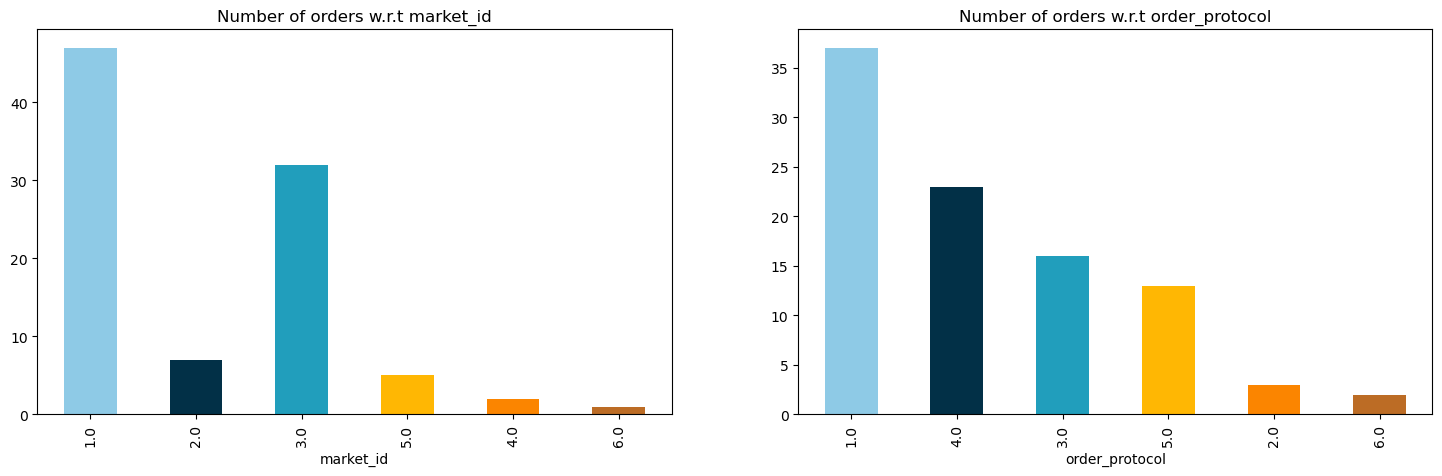

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))
df_neg.market_id.value_counts(sort = False, dropna = False).plot(kind = "bar", color = color, ax = ax[0])
ax[0].set_title("Number of orders w.r.t market_id")
df_neg["order_protocol"].value_counts(dropna = False).plot(kind = "bar", color = color, ax = ax[1])
ax[1].set_title("Number of orders w.r.t order_protocol")
plt.show()

feature total_onshift_partners - 
Sample looks Gaussian (fail to reject H0)
skew = 0.86 

feature total_busy_partners - 
Sample looks Gaussian (fail to reject H0)
skew = 0.78 



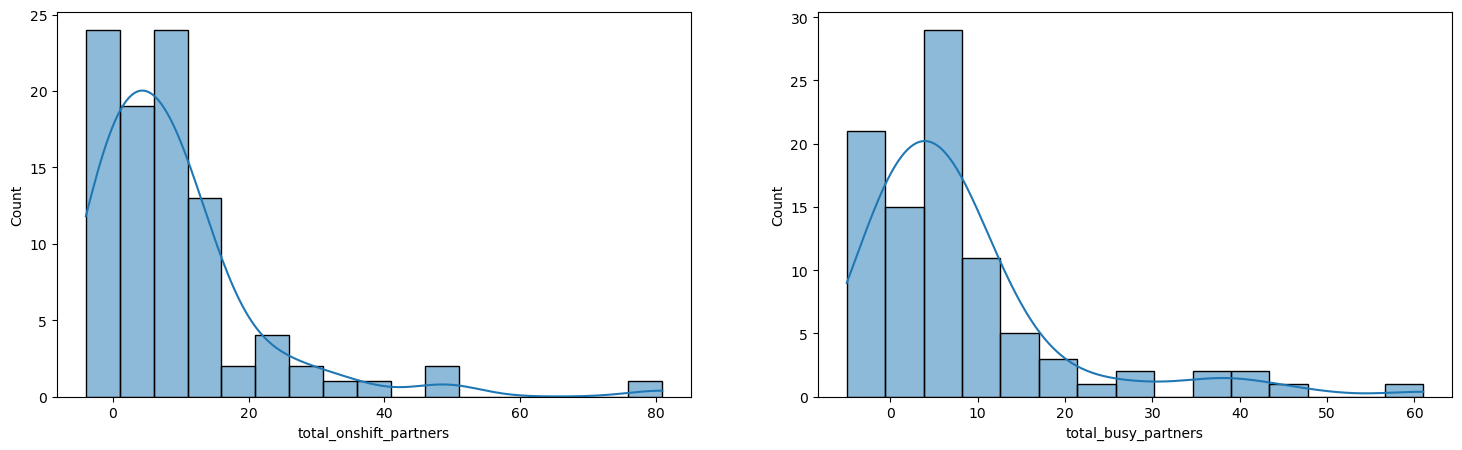

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

print(f"feature total_onshift_partners - ")
shapiro_test(df_neg.total_onshift_partners)
print(f"skew = {skew_info.loc['total_onshift_partners']} \n")

print(f"feature total_busy_partners - ")
shapiro_test(df_neg.total_busy_partners)
print(f"skew = {skew_info.loc['total_busy_partners']} \n")

sns.histplot(df_neg.total_onshift_partners, ax = ax[0], kde = True)
sns.histplot(df_neg.total_busy_partners, ax = ax[1], kde = True)
plt.show()

feature min_item_price - 
Sample does not look Gaussian (reject H0)
skew = 2.33 

feature max_item_price - 
Sample does not look Gaussian (reject H0)
skew = 2.2 



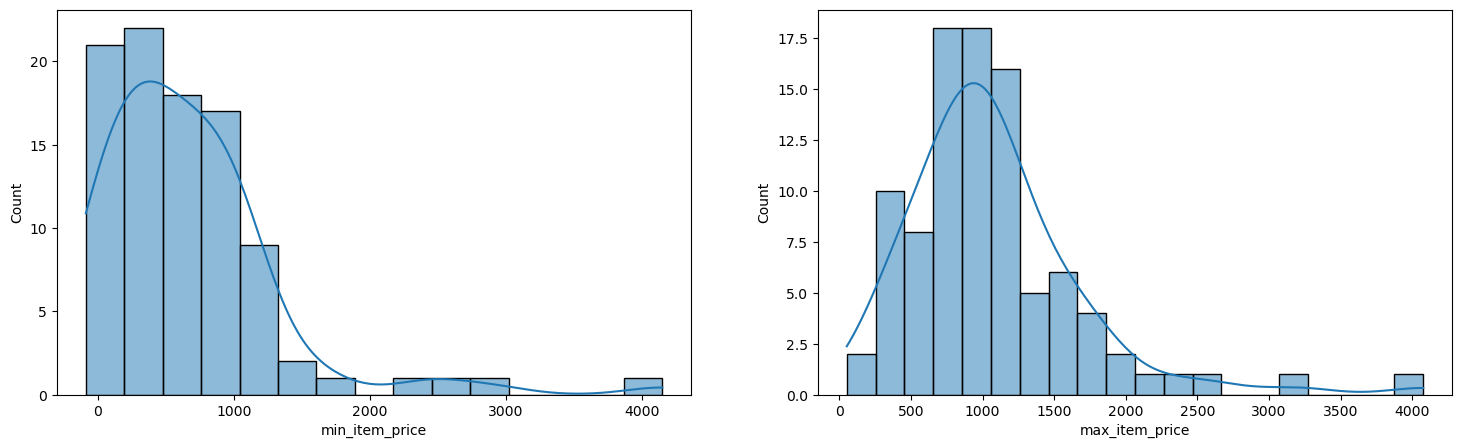

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

print(f"feature min_item_price - ")
shapiro_test(df_neg.min_item_price)
print(f"skew = {skew_info.loc['min_item_price']} \n")

print(f"feature max_item_price - ")
shapiro_test(df_neg.max_item_price)
print(f"skew = {skew_info.loc['max_item_price']} \n")

sns.histplot(df_neg.min_item_price, ax = ax[0], kde = True)
sns.histplot(df_neg.max_item_price, ax = ax[1], kde = True)
plt.show()

feature subtotal - 
Sample does not look Gaussian (reject H0)
skew = 1.96 



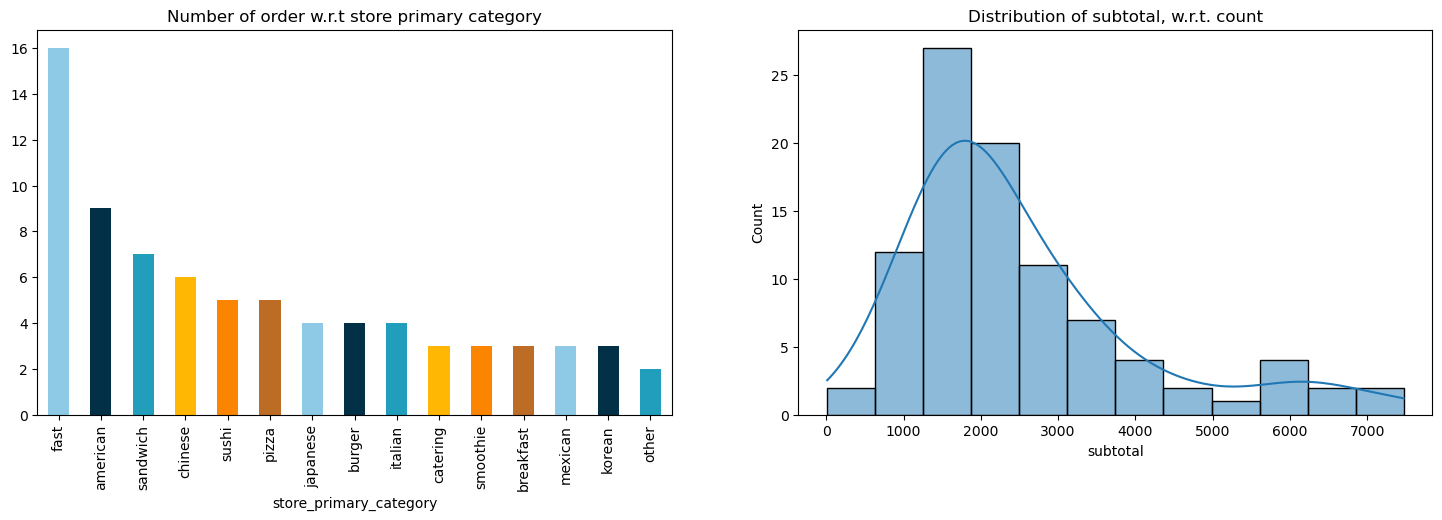

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

print(f"feature subtotal - ")
shapiro_test(df_neg.subtotal)
print(f"skew = {skew_info.loc['subtotal']} \n")

df_neg.store_primary_category.value_counts().head(15).plot(kind = "bar", color = color, ax = ax[0])
ax[0].set_title("Number of order w.r.t store primary category")

sns.histplot(df_neg.subtotal, ax = ax[1], kde = True)
ax[1].set_title("Distribution of subtotal, w.r.t. count")
plt.show()

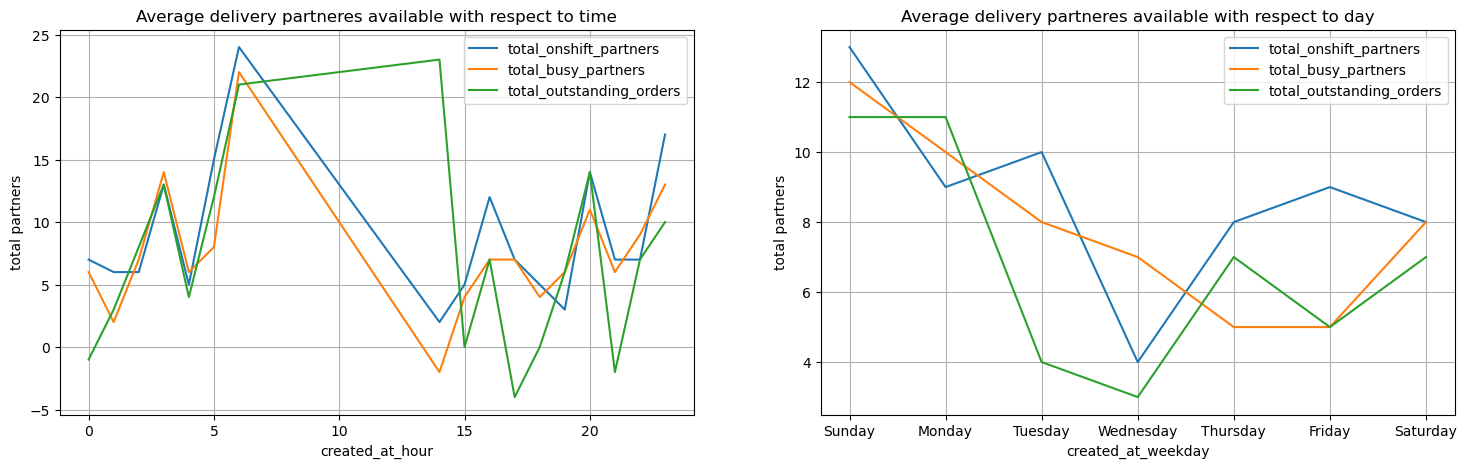

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))
df_neg.groupby(by = ["created_at_hour"])[["total_onshift_partners", "total_busy_partners", "total_outstanding_orders"]].mean().round().plot(kind = "line", grid = True, ax = ax[0])
ax[0].set_title("Average delivery partneres available with respect to time")
ax[0].set_ylabel("total partners")

df_neg.groupby(by = ["created_at_weekday"])[["total_onshift_partners", "total_busy_partners", "total_outstanding_orders"]].mean().round().loc[day_order, :].plot(kind = "line", grid = True, ax = ax[1])
ax[1].set_title("Average delivery partneres available with respect to day")
ax[1].set_ylabel("total partners")
plt.show()

feature created_at_hour - 
Sample does not look Gaussian (reject H0)
skew = 0.63 



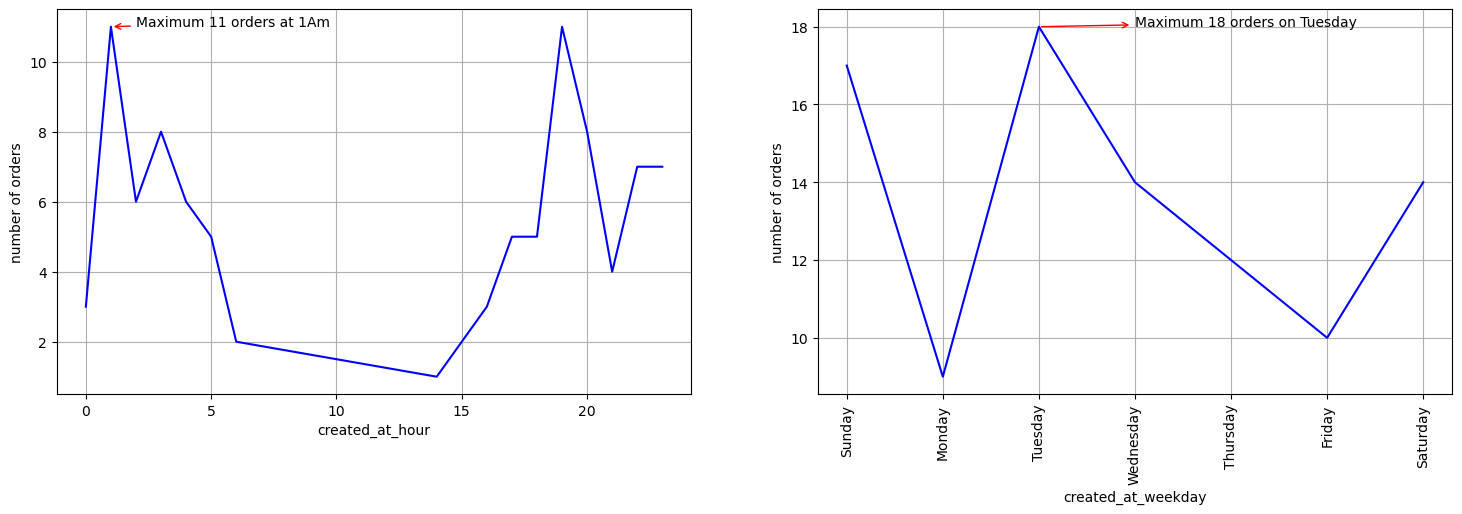

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

print(f"feature created_at_hour - ")
shapiro_test(df_neg.created_at_hour)
print(f"skew = {skew_info.loc['created_at_hour']} \n")

df_neg["created_at_hour"].value_counts().sort_index().plot(kind = "line", grid = True, ylabel = "number of orders", color = "blue", ax = ax[0])
max_value = df_neg["created_at_hour"].value_counts().max()
max_index = df_neg["created_at_hour"].value_counts().idxmax()

ax[0].annotate(f'Maximum {max_value} orders at {max_index}Am', xy=(max_index, max_value), xytext=(max_index+1, max_value), arrowprops=dict(arrowstyle='->', color = "red"))

day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
df_neg["created_at_weekday"].value_counts().reindex(day_order).plot(kind="line", grid=True, ylabel="number of orders", color="blue", ax = ax[1])
plt.xticks(rotation=90)

max_value = df_neg["created_at_weekday"].value_counts().max()
max_index = df_neg["created_at_weekday"].value_counts().idxmax()

ax[1].annotate(f'Maximum {max_value} orders on {max_index}', xy=(day_order.index(max_index), max_value), xytext=(day_order.index(max_index) + 1, max_value), arrowprops=dict(arrowstyle='<-', color="red"))
plt.show()

- there is a gap between, outstanding orders and total available partners at peak time
- the median delivery time for orders ordered from protocol 7 is less (but there are very less orders from the same protocol)
- orders from order protocols are varying with respect to market_id
- the median of subtotal is less for orders ordered from protocol 4

In [49]:
df.market_id = df.market_id.astype("float")
df.order_protocol = df.order_protocol.astype("float")
df.is_weekend = df.is_weekend.astype("float")

In [50]:
numerical_cols = [col for col in df.columns if df[col].dtype != "O" and df[col].dtype != "category" and df[col].dtype != "<M8[ns]"]
numerical_cols

['market_id',
 'order_protocol',
 'total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_partners',
 'total_busy_partners',
 'total_outstanding_orders',
 'created_at_hour',
 'actual_delivery_hour',
 'delivery_time',
 'is_weekend']

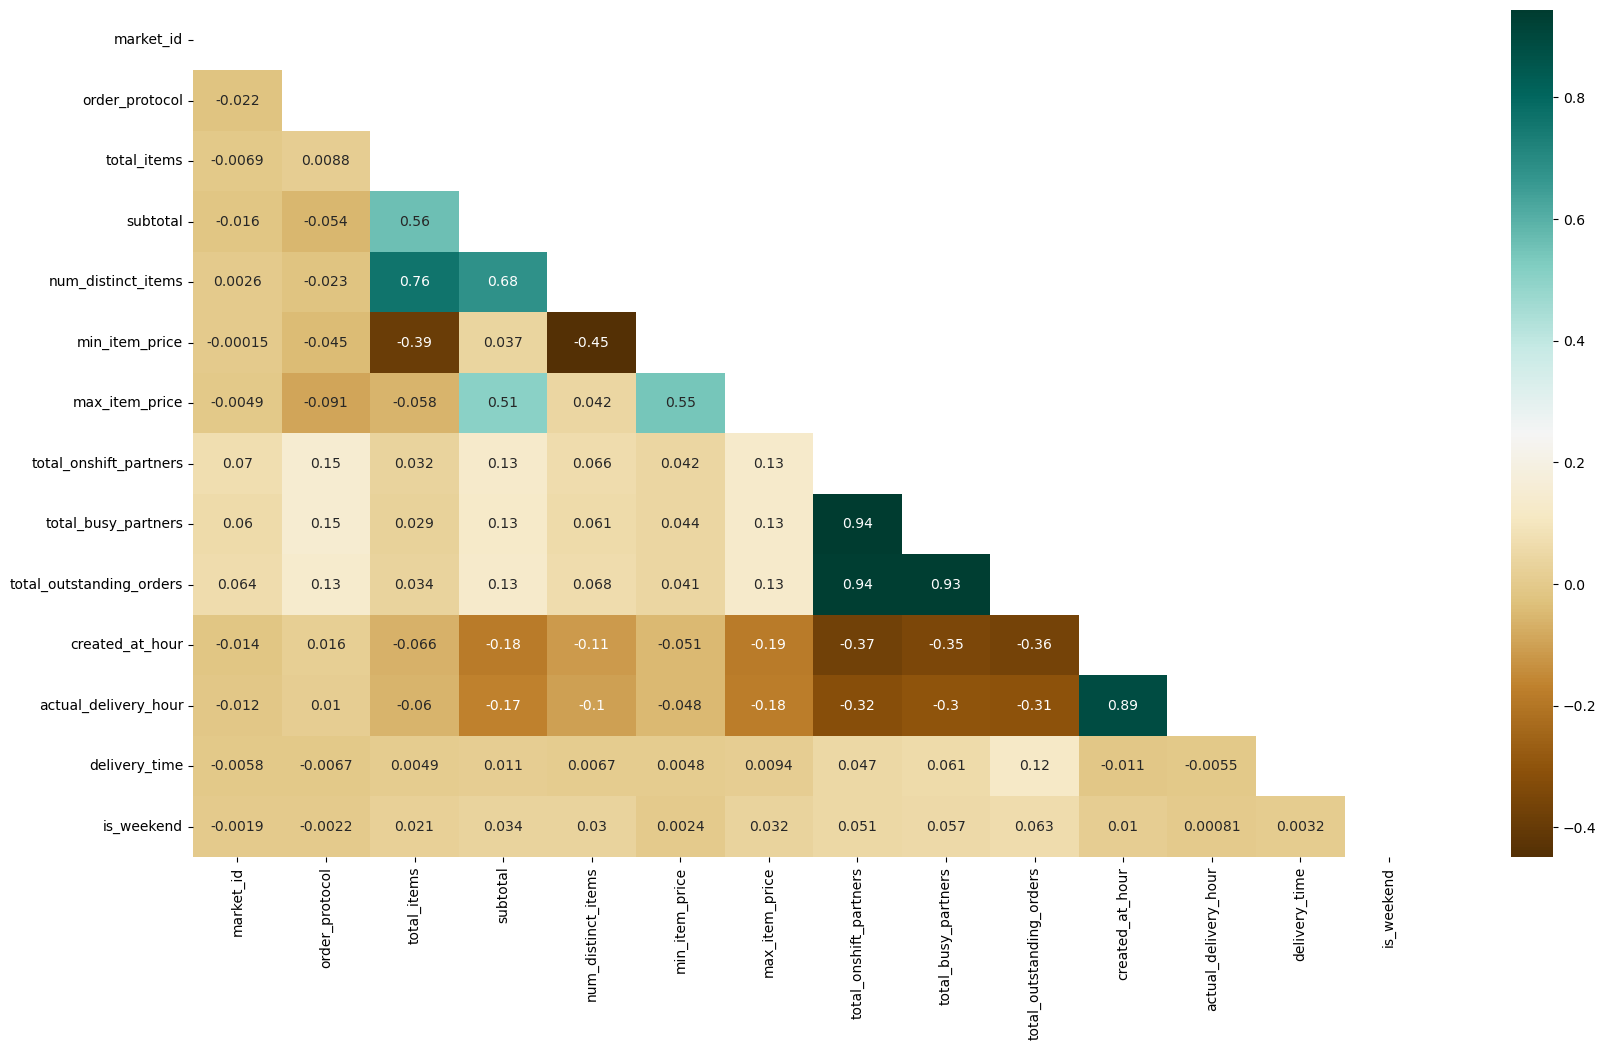

In [51]:
fig, ax = plt.subplots(figsize=(20,11))
sns.heatmap(df[numerical_cols].corr(), annot = True, cmap = 'BrBG', ax = ax, mask = np.triu(np.ones_like(df[numerical_cols].corr(), dtype=bool)))
plt.show()

## Data Pre-processing

In [82]:
df_copy = df.copy()
df_copy.shape

(197428, 22)

In [83]:
# df_copy.drop(["created_at", "actual_delivery_time", "actual_delivery_month", "created_at_month", "actual_delivery_month", "actual_deliveryt_weekday", "actual_delivery_hour", "market_id", "store_id", "store_primary_category", 'created_at_weekday', 'created_at_hour', 'is_weekend'], axis = 1, inplace = True)

In [84]:
df_copy = df_copy.drop(df_neg.index, axis = 0)

In [85]:
df_copy.drop(df[df.created_at_month == "October"].index, axis = 0, inplace = True)
# df_copy.drop(df_neg.index, axis = 0 , inplace = True)
df_copy.dropna(subset = ["actual_delivery_time"], inplace = True)
# df_copy.dropna(inplace = True)


df_copy.shape

(197326, 22)

In [86]:
# df_copy['min_item_price'] = (df_copy['min_item_price'] + df_copy['max_item_price']) / 2
# df_copy.drop(["max_item_price"],inplace=True,axis=1)

In [316]:
df_copy.shape

(180149, 9)

In [87]:
X = df_copy.drop("delivery_time", axis = 1).copy()
y = df_copy.delivery_time.copy()

In [88]:
numerical_cols.remove("delivery_time")

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print(f"the shape of train data : ")
print(f"   X_train = {X_train.shape}\n   y_train = {y_train.shape}")
print("--" * 20)
print(f"the shape of test data : ")
print(f"   X_test = {X_test.shape}\n   y_test = {y_test.shape}")
print("--" * 60)

the shape of train data : 
   X_train = (157860, 21)
   y_train = (157860,)
----------------------------------------
the shape of test data : 
   X_test = (39466, 21)
   y_test = (39466,)
------------------------------------------------------------------------------------------------------------------------


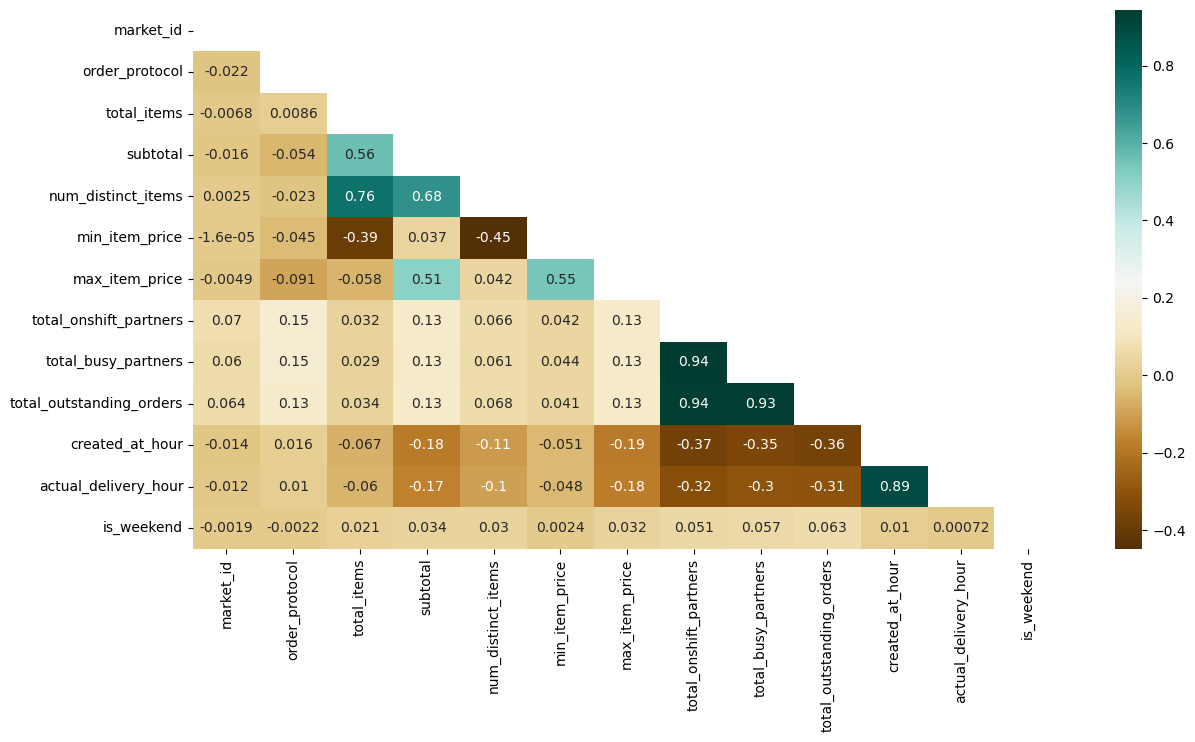

In [92]:
fig, ax = plt.subplots(figsize=(14,7))
sns.heatmap(df_copy[numerical_cols].corr(), annot = True, cmap = 'BrBG',  mask = np.triu(np.ones_like(df_copy[numerical_cols].corr(), dtype=bool)))
plt.show()

#### missing value imputation

In [93]:
missing_data = X_train.isna().sum().reset_index().rename({"index" : "feature", 0 : "missing_val_count"}, axis = 1)
missing_data = missing_data[missing_data.missing_val_count > 0]
missing_data["missing_val_percentage"] = np.round((missing_data["missing_val_count"] / df.shape[0]) * 100, 2)
missing_data = missing_data.sort_values(by = "missing_val_count", ascending = False)
missing_data

,feature,missing_val_count,missing_val_percentage
11,total_onshift_partners,13036,6.60
12,total_busy_partners,13036,6.60
13,total_outstanding_orders,13036,6.60
4,store_primary_category,3802,1.93
0,market_id,808,0.41
5,order_protocol,787,0.40


In [94]:
missing_data = X_test.isna().sum().reset_index().rename({"index" : "feature", 0 : "missing_val_count"}, axis = 1)
missing_data = missing_data[missing_data.missing_val_count > 0]
missing_data["missing_val_percentage"] = np.round((missing_data["missing_val_count"] / df.shape[0]) * 100, 2)
missing_data = missing_data.sort_values(by = "missing_val_count", ascending = False)
missing_data

,feature,missing_val_count,missing_val_percentage
11,total_onshift_partners,3224,1.63
12,total_busy_partners,3224,1.63
13,total_outstanding_orders,3224,1.63
4,store_primary_category,956,0.48
5,order_protocol,208,0.11
0,market_id,179,0.09


In [95]:
most_market_id = X_train.market_id.value_counts().index[0]
market_id_map = X_train.groupby('store_id')['market_id'].apply(lambda x: x.mode()[0] if not x.isnull().all() else most_market_id).reset_index()

X_train.loc[X_train.market_id.isna(), "market_id"] = X_train.loc[X_train.market_id.isna()].apply(market_map, given_info = market_id_map, most_market_id = most_market_id, axis = 1)
print(f"missing values in X_train")
display(X_train.loc[:,["market_id"]].isna().sum())


X_test.loc[X_test.market_id.isna(), "market_id"] = X_test.loc[X_test.market_id.isna()].apply(market_map, given_info = market_id_map, most_market_id = most_market_id, axis = 1)
print(f"missing values in X_test")
display(X_test.loc[:,["market_id"]].isna().sum())


missing values in X_train


market_id    0
dtype: int64

missing values in X_test


market_id    0
dtype: int64

In [96]:
delivery_partners_grps = X_train.groupby(by = ["created_at_weekday", "created_at_hour"])[["total_onshift_partners", "total_busy_partners", "total_outstanding_orders"]].apply("mean").round().reset_index()
mean_total_onshift_partners = X_train.total_onshift_partners.mean()
mean_total_busy_partners = X_train.total_busy_partners.mean()
mean_total_outstanding_orders = X_train.total_outstanding_orders.mean()

X_train.loc[X_train.total_onshift_partners.isna(), "total_onshift_partners"] = X_train.loc[X_train.total_onshift_partners.isna()].apply(delivery_partners, given_info = delivery_partners_grps, total_onshift_partners = True, avg = mean_total_onshift_partners, axis = 1)
X_train.loc[X_train.total_busy_partners.isna(), "total_busy_partners"] = X_train.loc[X_train.total_busy_partners.isna()].apply(delivery_partners, given_info = delivery_partners_grps, total_busy_partners = True, avg = mean_total_busy_partners, axis = 1)
X_train.loc[X_train.total_outstanding_orders.isna(), "total_outstanding_orders"] = X_train.loc[X_train.total_outstanding_orders.isna()].apply(delivery_partners, given_info = delivery_partners_grps, total_outstanding_orders = True, avg = mean_total_outstanding_orders, axis = 1)
print(f"missing values in X_train")
display(X_train.loc[:,["total_onshift_partners", "total_busy_partners", "total_outstanding_orders"]].isna().sum())

X_test.loc[X_test.total_onshift_partners.isna(), "total_onshift_partners"] = X_test.loc[X_test.total_onshift_partners.isna()].apply(delivery_partners, given_info = delivery_partners_grps, total_onshift_partners = True, avg = mean_total_onshift_partners,  axis = 1)
X_test.loc[X_test.total_busy_partners.isna(), "total_busy_partners"] = X_test.loc[X_test.total_busy_partners.isna()].apply(delivery_partners, given_info = delivery_partners_grps, total_busy_partners = True, avg = mean_total_busy_partners, axis = 1)
X_test.loc[X_test.total_outstanding_orders.isna(), "total_outstanding_orders"] = X_test.loc[X_test.total_outstanding_orders.isna()].apply(delivery_partners, given_info = delivery_partners_grps, total_outstanding_orders = True, avg = mean_total_outstanding_orders, axis = 1)
print(f"missing values in X_test")
display(X_test.loc[:,["total_onshift_partners", "total_busy_partners", "total_outstanding_orders"]].isna().sum())

missing values in X_train


total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64

missing values in X_test


total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64

In [97]:
order_protocol_grps = X_train.groupby(by = ["created_at_weekday", "market_id"])["order_protocol"].apply(lambda x : x.mode()[0]).reset_index()

X_train.loc[X_train.order_protocol.isna(), "order_protocol"] = X_train.loc[X_train.order_protocol.isna()].apply(order_protocol_value, given_info = order_protocol_grps, axis = 1)
X_test.loc[X_test.order_protocol.isna(), "order_protocol"] = X_test.loc[X_test.order_protocol.isna()].apply(order_protocol_value, given_info = order_protocol_grps, axis = 1)

In [98]:
store_grps = X_train.groupby(by = ["created_at_hour", "created_at_weekday", "store_primary_category", "market_id", "store_id"])[["subtotal"]].apply("mean").reset_index()
most_store_primary_category = X_train.store_primary_category.mode()[0]

X_train.loc[X_train.store_primary_category.isna(), "store_primary_category"] = X_train[X_train.store_primary_category.isna()].apply(store_category, given_info = store_grps, most_store_primary_category = most_store_primary_category, axis = 1)
X_test.loc[X_test.store_primary_category.isna(), "store_primary_category"] = X_test[X_test.store_primary_category.isna()].apply(store_category, given_info = store_grps, most_store_primary_category = most_store_primary_category, axis = 1)

#### Data transformation/ outlier detection

In [99]:
skew_info

total_items                  21.41
subtotal                      1.96
num_distinct_items            1.59
min_item_price                2.33
max_item_price                2.20
total_onshift_partners        0.86
total_busy_partners           0.78
total_outstanding_orders      1.20
created_at_hour               0.63
actual_delivery_hour          0.75
delivery_time               439.70
dtype: float64

In [100]:
X_train["total_items"] = np.log(X_train.total_items + 0.00000001)
X_test["total_items"] = np.log(X_test.total_items + 0.00000001)

In [101]:
y_train = np.log(y_train + 0.00000001)

In [102]:
X_train.drop(["created_at", "actual_delivery_time", "actual_delivery_month", "created_at_month", "actual_delivery_month", "actual_deliveryt_weekday", "actual_delivery_hour"], axis = 1, inplace = True)
X_test.drop(["created_at", "actual_delivery_time", "actual_delivery_month", "created_at_month", "actual_delivery_month", "actual_deliveryt_weekday", "actual_delivery_hour"], axis = 1, inplace = True)

In [103]:
transform_cols = ["total_items", "subtotal", "num_distinct_items", "min_item_price", "max_item_price", "total_onshift_partners", "total_busy_partners", "total_outstanding_orders", "delivery_time"]

In [104]:
train = pd.concat([X_train.reset_index(drop = True), y_train.reset_index(drop = True)], axis = 1)

In [105]:
for col in transform_cols:
    lb = np.quantile(train[col],0.25)
    ub = np.quantile(train[col],0.75)
    IQR = ub - lb

    upper_limit = ub + 3 * IQR
    lower_limit = lb - 3 * IQR

    train = train[(train[col] >= lower_limit) & (train[col] <= upper_limit)]

In [106]:
train.shape

(154178, 16)

In [107]:
X_train = train.drop("delivery_time", axis = 1).copy()
y_train = train.delivery_time.copy()

In [108]:
X_train.isna().sum()

market_id                   0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
created_at_weekday          0
created_at_hour             0
is_weekend                  0
dtype: int64

## Model

In [109]:
cols = [col for col in X_train.columns if X_train[col].nunique() <= 30 or X_train[col].dtype == "O"]
# cols.append("store_primary_category")
# cols.append("store_id")
print(cols)


['market_id', 'store_id', 'store_primary_category', 'order_protocol', 'num_distinct_items', 'created_at_weekday', 'created_at_hour', 'is_weekend']


In [110]:
te = TargetEncoder(cols = cols)
te.fit(X_train, y_train)

X_train = te.transform(X_train)
X_test = te.transform(X_test)

In [111]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_sca = scaler.transform(X_train)
X_test_sca = scaler.transform(X_test)

In [112]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_sca, y_train)
model.score(X_train_sca, y_train)

0.31329317773159315

In [114]:
model.score(X_test_sca, np.log(y_test + 0.00000001))

0.29753905152002114

In [115]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.metrics import R2Score

In [116]:
def plot_history(history,key):
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel("Epochs")
    plt.ylabel(key)
    plt.legend([key,'val_'+key])
    plt.show()

In [129]:
L2Reg = tf.keras.regularizers.L2(l2=1e-6)
model2 = Sequential()
model2.add(Dense(14,kernel_initializer='normal'))
model2.add(BatchNormalization())
model2.add(Activation("relu"))
model2.add(Dense(1024))
model2.add(Dropout(0.25))
model2.add(BatchNormalization())
model2.add(Activation("relu"))
model2.add(Dense(512))
model2.add(Dropout(0.25))
model2.add(BatchNormalization())
model2.add(Activation("relu"))
model2.add(Dense(256))
model2.add(Dropout(0.25))
model2.add(BatchNormalization())
model2.add(Activation("relu"))
model2.add(Dense(128))
model2.add(Dropout(0.25))
model2.add(BatchNormalization())
model2.add(Activation("relu"))
model2.add(Dense(64))
model2.add(Dropout(0.25))
model2.add(BatchNormalization())
model2.add(Activation("relu"))
model2.add(Dense(32))
model2.add(Dropout(0.25))
model2.add(BatchNormalization())
model2.add(Activation("relu"))
model2.add(Dense(1,activation='linear'))

In [130]:
model2.compile(
    optimizer = "adam", # stochastic gradient descent, adam, rmsprop, adadelts
    loss = "mean_squared_error", # sigmoid loss, # mean_squared_error, categorical_crossentropy, sparse_categorical_crossentropy, binary_crossentropy
    metrics = [R2Score(),'mae']
)

In [131]:
EarlyStoppingCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7,  restore_best_weights=True, verbose=1)
ModelCheckpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath='tf_model.h5',
                                                             monitor='val_loss',
                                                             save_best_only=True,
                                                             mode='min', verbose = 1)

In [132]:
from tensorflow.keras.callbacks import TensorBoard

now = datetime.now()
log_folder = "tf_logs/.../" + now.strftime("%Y%m%d-%H%M%S") + "/"

tb_callback = TensorBoard(log_dir=log_folder, histogram_freq=1)

In [133]:
history2 = model2.fit(X_train_sca, y_train, validation_split= 0.2,  epochs=500, batch_size=64, verbose=1, callbacks = [EarlyStoppingCallback, ModelCheckpointCallback])

Epoch 1/500


1926/1928 [============================>.] - ETA: 0s - loss: 0.7996 - r2_score: -5.1756 - mae: 0.6117
Epoch 1: val_loss improved from inf to 0.21208, saving model to tf_model.h5
1928/1928 [==============================] - 12s 6ms/step - loss: 0.7992 - r2_score: -5.1729 - mae: 0.6115 - val_loss: 0.2121 - val_r2_score: -0.6494 - val_mae: 0.3738
Epoch 2/500
1920/1928 [============================>.] - ETA: 0s - loss: 0.1685 - r2_score: -0.3011 - mae: 0.3224
Epoch 2: val_loss improved from 0.21208 to 0.11625, saving model to tf_model.h5
1928/1928 [==============================] - 11s 6ms/step - loss: 0.1684 - r2_score: -0.3006 - mae: 0.3223 - val_loss: 0.1162 - val_r2_score: 0.0960 - val_mae: 0.2642
Epoch 3/500
1922/1928 [============================>.] - ETA: 0s - loss: 0.1340 - r2_score: -0.0348 - mae: 0.2855
Epoch 3: val_loss did not improve from 0.11625
1928/1928 [==============================] - 12s 6ms/step - loss: 0.1340 - r2_score: -0.0347 - mae: 0.2854 - val_loss: 0.1169 - val_

In [134]:
model2.evaluate(X_test_sca, np.log(y_test + 0.00000001))

   1/1234 [..............................] - ETA: 26s - loss: 0.0862 - r2_score: 0.5624 - mae: 0.2344

1234/1234 [==============================] - 2s 2ms/step - loss: 0.0894 - r2_score: 0.3255 - mae: 0.2315


[0.08940640836954117, 0.32547712326049805, 0.23154357075691223]

In [135]:
def MAPE(Y_actual,Y_Predicted):
    mape=np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [137]:
prediction = model2.predict(X_test_sca)
prediction = prediction.reshape(y_test.shape[0], )
print("mape : ",MAPE(np.log(y_test + 0.00000001),prediction))

  30/1234 [..............................] - ETA: 2s 

1234/1234 [==============================] - 2s 2ms/step
mape :  6.161049599668702


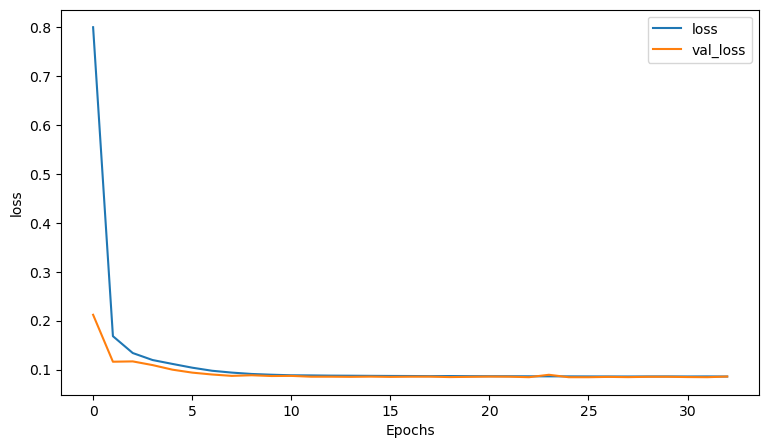

In [138]:
plot_history(history2,'loss')

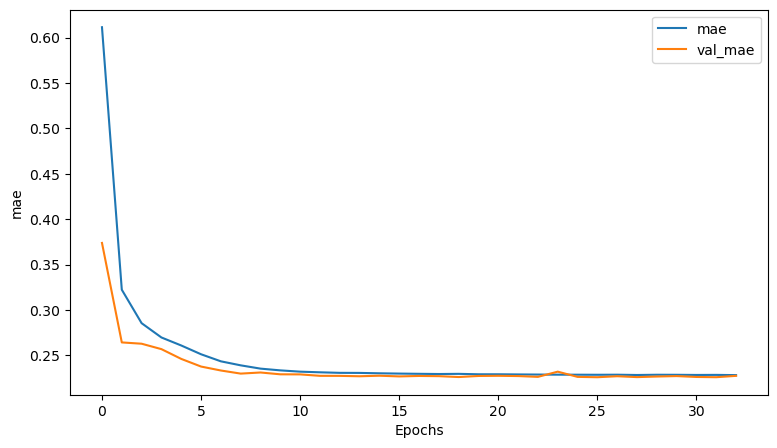

In [139]:
plot_history(history2,'mae')

In [142]:
from sklearn.ensemble import RandomForestRegressor

regressor=RandomForestRegressor(n_jobs = -1)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [143]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
prediction=regressor.predict(X_test)
mse=mean_squared_error(np.log(y_test + 0.00000001),prediction)
rmse=mse**.5
print("mse : ",mse)
print("rmse : ",rmse)
mae=mean_absolute_error(np.log(y_test + 0.00000001),prediction)
print("mase : ",mae)

mse :  0.0895124595550834
rmse :  0.29918632915807397
mase :  0.23145897664550605


In [144]:
r2_score(np.log(y_test + 0.00000001),prediction)

0.3247541963521384

In [145]:
print("mape : ",MAPE(np.log(y_test + 0.00000001),prediction))

mape :  6.174383096133542


Text(0.5, 0, 'Random Forest Feature Importance')

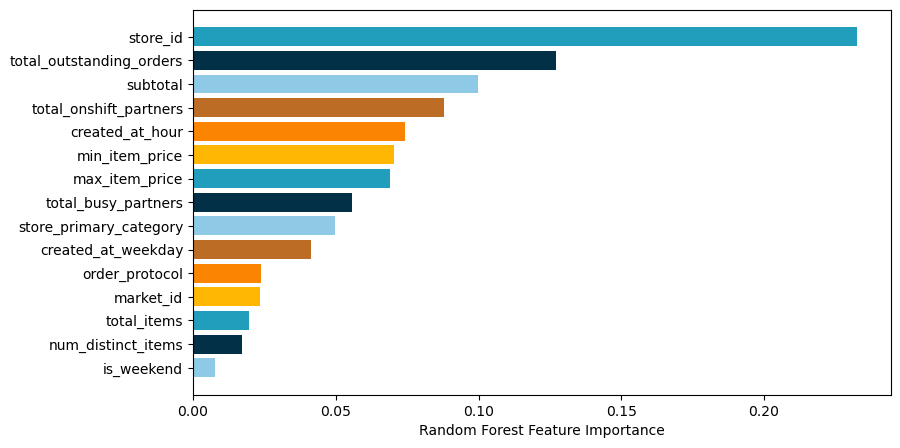

In [147]:
sorted_idx=regressor.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx],regressor.feature_importances_[sorted_idx], color = color)
plt.xlabel("Random Forest Feature Importance")